In [ ]:
import numpy as np
from framework.boundedManifold import BoundedManifold

# Define a simple metric tensor function (e.g., identity matrix for a Euclidean space)
def euclidean_metric_tensor(point: np.ndarray) -> np.ndarray:
    # In a Euclidean space, the metric tensor is typically the identity matrix
    # at all points. Its size depends on the dimension of the space.
    dimension = len(point)
    # print(f"  (Computing metric tensor for point: {point})") # Uncomment for verbose output
    return np.eye(dimension)

# Define a non-Euclidean metric for demonstration (e.g., a simple scaling factor)
def curved_metric_tensor(point: np.ndarray) -> np.ndarray:
    # Example of a metric that changes with position
    # For a 2D space, let G = [[1+x^2, 0], [0, 1+y^2]]
    x, y = point[0], point[1]
    g_xx = 1 + x**2
    g_yy = 1 + y**2
    return np.array([[g_xx, 0], [0, g_yy]])


print("--- 2D Manifold with Caching and Grid Interpolation (Euclidean Metric) ---")
bounds_2d_euclidean = np.array([[0.0, 1.0], [0.0, 1.0]]) # x from 0 to 1, y from 0 to 1
# Define a 3x3 grid (3 points along x, 3 points along y)
manifold_2d_euclidean = BoundedManifold(euclidean_metric_tensor, bounds_2d_euclidean, cache=True, grid_points_per_dim=3)

print(f"Manifold dimension: {manifold_2d_euclidean.get_dimension()}")
print(f"Grid points per dimension: {manifold_2d_euclidean._grid_points_per_dim}")
print(f"Grid X axis points: {manifold_2d_euclidean._grid_axes[0]}")
print(f"Grid Y axis points: {manifold_2d_euclidean._grid_axes[1]}")


# Try to get metric tensor before computing the full grid (will raise error)
point_test_no_grid = np.array([0.25, 0.25])
try:
    print(f"\nAttempting to get metric tensor at {point_test_no_grid} before computing grid:")
    manifold_2d_euclidean.metric_tensor(point_test_no_grid)
except RuntimeError as e:
    print(f"Error caught (as expected): {e}")

# Now, compute the metric tensor for the entire grid
print("\n--- Populating the Grid Cache ---")
manifold_2d_euclidean.compute_full_grid_metric_tensor()

# Test points for metric tensor retrieval
point_a_grid = np.array([0.0, 0.0]) # Exactly on a grid point
point_b_grid = np.array([0.5, 0.5]) # Center of the manifold, between grid points
point_c_grid = np.array([1.0, 1.0]) # Exactly on another grid point
point_d_grid = np.array([0.25, 0.75]) # Off-grid point

print(f"\nMetric tensor at {point_a_grid} (grid point):")
mt_a_grid = manifold_2d_euclidean.metric_tensor(point_a_grid)
print(mt_a_grid)

print(f"\nMetric tensor at {point_b_grid} (interpolated):")
mt_b_grid = manifold_2d_euclidean.metric_tensor(point_b_grid)
print(mt_b_grid)

print(f"\nMetric tensor at {point_c_grid} (grid point):")
mt_c_grid = manifold_2d_euclidean.metric_tensor(point_c_grid)
print(mt_c_grid)

print(f"\nMetric tensor at {point_d_grid} (interpolated):")
mt_d_grid = manifold_2d_euclidean.metric_tensor(point_d_grid)
print(mt_d_grid)

# Test out-of-bounds point
point_out_of_bounds = np.array([1.1, 0.5])
try:
    print(f"\nAttempting to get metric tensor at out-of-bounds point {point_out_of_bounds}:")
    manifold_2d_euclidean.metric_tensor(point_out_of_bounds)
except ValueError as e:
    print(f"Error caught: {e}")

# Test wrong dimension point
point_wrong_dim = np.array([0.5])
try:
    print(f"\nAttempting to get metric tensor at wrong dimension point {point_wrong_dim}:")
    manifold_2d_euclidean.metric_tensor(point_wrong_dim)
except ValueError as e:
    print(f"Error caught: {e}")

print("\n" + "="*50)
print("--- Testing New Methods (Euclidean Metric) ---")
print("="*50)

# Test Christoffel Symbols
print("\nComputing Christoffel Symbols for Euclidean Manifold at [0.5, 0.5]:")
christoffel_euclidean = manifold_2d_euclidean.compute_christoffel(np.array([0.5, 0.5]))
print(christoffel_euclidean) # Should be all zeros for Euclidean space

# Test Geodesic Computation
start_geo = np.array([0.1, 0.1])
end_geo = np.array([0.9, 0.9])
print(f"\nComputing Geodesic from {start_geo} to {end_geo} on Euclidean Manifold:")
geodesic_path_euclidean = manifold_2d_euclidean.compute_geodesic(start_geo, end_geo, num_points=10)
print("First few geodesic points:")
print(geodesic_path_euclidean[:3])
print("Last geodesic point:")
print(geodesic_path_euclidean[-1])

# Test Geodesic Distance
dist_euclidean = manifold_2d_euclidean._geodesic_distance(start_geo, end_geo)
print(f"\nGeodesic distance from {start_geo} to {end_geo}: {dist_euclidean:.4f}")
print(f"Euclidean distance (for comparison): {np.linalg.norm(end_geo - start_geo):.4f}")


# Test create_riemannian_distance_matrix
data_points_euclidean = np.array([[0.1, 0.1], [0.5, 0.5], [0.9, 0.1], [0.1, 0.9]])
print("\nCreating Riemannian Distance Matrix for Euclidean Manifold:")
dist_matrix_euclidean = manifold_2d_euclidean.create_riemannian_distance_matrix(data_points_euclidean)
print(dist_matrix_euclidean)

# Test Gaussian Curvature (on a 2x2 identity matrix)
print("\nComputing Gaussian Curvature (Proxy) for identity metric tensor:")
identity_metric = np.eye(2)
curvature_identity_proxy = BoundedManifold.compute_gaussian_curvature(identity_metric)
print(f"Curvature (Proxy) of identity metric: {curvature_identity_proxy:.4f}") # Should be log(1+1) = log(2)


# --- New: Test True Gaussian Curvature ---
print("\n--- Testing TRUE Gaussian Curvature (Euclidean Metric) ---")
true_curvature_euclidean = manifold_2d_euclidean.compute_true_gaussian_curvature(np.array([0.5, 0.5]), h=1e-3)
print(f"True Gaussian Curvature at [0.5, 0.5] (Euclidean): {true_curvature_euclidean:.4e}") # Should be very close to 0

print("\n" + "="*50)
print("--- Testing New Methods (Curved Metric) ---")
print("="*50)

bounds_2d_curved = np.array([[-2.0, 2.0], [-2.0, 2.0]])
manifold_2d_curved = BoundedManifold(curved_metric_tensor, bounds_2d_curved, cache=True, grid_points_per_dim=5)
print(f"\nManifold dimension (Curved): {manifold_2d_curved.get_dimension()}")
print("Populating cache for curved manifold...")
manifold_2d_curved.compute_full_grid_metric_tensor()

# Test Christoffel Symbols for curved metric (should not be all zeros)
point_curved = np.array([0.5, 0.5])
print(f"\nComputing Christoffel Symbols for Curved Manifold at {point_curved}:")
christoffel_curved = manifold_2d_curved.compute_christoffel(point_curved)
print(christoffel_curved)

# Test Gaussian Curvature (Proxy) for curved metric
print(f"\nComputing Gaussian Curvature (Proxy) for Curved Manifold at {point_curved}:")
metric_at_curved = manifold_2d_curved.metric_tensor(point_curved)
curvature_curved_proxy = BoundedManifold.compute_gaussian_curvature(metric_at_curved)
print(f"Metric at {point_curved}:\n{metric_at_curved}")
print(f"Curvature (Proxy) at {point_curved}: {curvature_curved_proxy:.4f}")

# --- New: Test True Gaussian Curvature for curved manifold ---
print("\n--- Testing TRUE Gaussian Curvature (Curved Metric) ---")
point_curved_true = np.array([0.5, 0.5])
true_curvature_curved = manifold_2d_curved.compute_true_gaussian_curvature(point_curved_true, h=1e-3)
print(f"True Gaussian Curvature at {point_curved_true} (Curved): {true_curvature_curved:.4f}")

# Test Geodesic Computation for curved manifold
start_geo_curved = np.array([-1.5, -1.5])
end_geo_curved = np.array([1.5, 1.5])
print(f"\nComputing Geodesic from {start_geo_curved} to {end_geo_curved} on Curved Manifold:")
geodesic_path_curved = manifold_2d_curved.compute_geodesic(start_geo_curved, end_geo_curved, num_points=20)
print("First few geodesic points (Curved):")
print(geodesic_path_curved[:3])
print("Last geodesic point (Curved):")
print(geodesic_path_curved[-1])

# Test Geodesic Distance for curved manifold
dist_curved = manifold_2d_curved._geodesic_distance(start_geo_curved, end_geo_curved)
print(f"\nGeodesic distance from {start_geo_curved} to {end_geo_curved} on Curved Manifold: {dist_curved:.4f}")
print(f"Euclidean distance (for comparison): {np.linalg.norm(end_geo_curved - start_geo_curved):.4f}")


# Example 3: 3D manifold without caching (old functionality check)
print("\n--- 3D Manifold without Caching (Old functionality check) ---")
bounds_3d = np.array([[-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0]])
# Note: grid_points_per_dim is ignored if cache is False
manifold_3d_no_cache = BoundedManifold(euclidean_metric_tensor, bounds_3d, cache=False, grid_points_per_dim=5)

print(f"Manifold dimension: {manifold_3d_no_cache.get_dimension()}")

point_e = np.array([0.0, 0.0, 0.0])
point_f = np.array([0.8, -0.2, 0.5])

# Calls for point_e and point_f (will always recompute as caching is off)
print(f"Metric tensor at {point_e}:")
mt_e1 = manifold_3d_no_cache.metric_tensor(point_e)
print(mt_e1)

print(f"Metric tensor at {point_f}:")
mt_f1 = manifold_3d_no_cache.metric_tensor(point_f)
print(mt_f1)

# Verify no cache processing is attempted if cache is disabled
try:
    manifold_3d_no_cache.compute_full_grid_metric_tensor()
except Exception as e:
    print(f"Unexpected error during compute_full_grid_metric_tensor with cache=False: {e}")

--- 2D Manifold with Caching and Grid Interpolation (Euclidean Metric) ---
Manifold dimension: 2
Grid points per dimension: [3, 3]
Grid X axis points: [0.  0.5 1. ]
Grid Y axis points: [0.  0.5 1. ]

Attempting to get metric tensor at [0.25 0.25] before computing grid:
Error caught (as expected): Grid cache at (np.int64(0), np.int64(0)) contains uncomputed values (NaN). Call `compute_full_grid_metric_tensor()` first to populate the cache.

--- Populating the Grid Cache ---
Computing metric tensors for 9 grid points...
Full grid metric tensor computation complete.

Metric tensor at [0. 0.] (grid point):
[[1. 0.]
 [0. 1.]]

Metric tensor at [0.5 0.5] (interpolated):
[[1. 0.]
 [0. 1.]]

Metric tensor at [1. 1.] (grid point):
[[1. 0.]
 [0. 1.]]

Metric tensor at [0.25 0.75] (interpolated):
[[1. 0.]
 [0. 1.]]

Attempting to get metric tensor at out-of-bounds point [1.1 0.5]:
Error caught: Point [1.1 0.5] is outside the defined manifold bounds: [[0. 1.]
 [0. 1.]]

Attempting to get metric te

Calculating distances: 100%|██████████| 6/6 [00:00<00:00, 187.88it/s]

Distance matrix calculation complete.
[[0.         0.83576418 0.95657007 1.1593452 ]
 [0.83576418 0.         0.85814553 1.0417581 ]
 [0.95657007 0.85814553 0.         1.52849565]
 [1.1593452  1.0417581  1.52849565 0.        ]]

Computing Gaussian Curvature (Proxy) for identity metric tensor:
Curvature (Proxy) of identity metric: 0.6931

--- Testing TRUE Gaussian Curvature (Euclidean Metric) ---
True Gaussian Curvature at [0.5, 0.5] (Euclidean): 0.0000e+00

--- Testing New Methods (Curved Metric) ---

Manifold dimension (Curved): 2
Populating cache for curved manifold...
Computing metric tensors for 25 grid points...
Full grid metric tensor computation complete.

Computing Christoffel Symbols for Curved Manifold at [0.5 0.5]:
[[[0.33333333 0.        ]
  [0.         0.        ]]

 [[0.         0.        ]
  [0.         0.33333333]]]

Computing Gaussian Curvature (Proxy) for Curved Manifold at [0.5 0.5]:
Metric at [0.5 0.5]:
[[1.5 0. ]
 [0.  1.5]]
Curvature (Proxy) at [0.5 0.5]: 1.1787

-


--- Testing Visualization (Curved Metric) ---

Visualizing Curved manifold curvature:


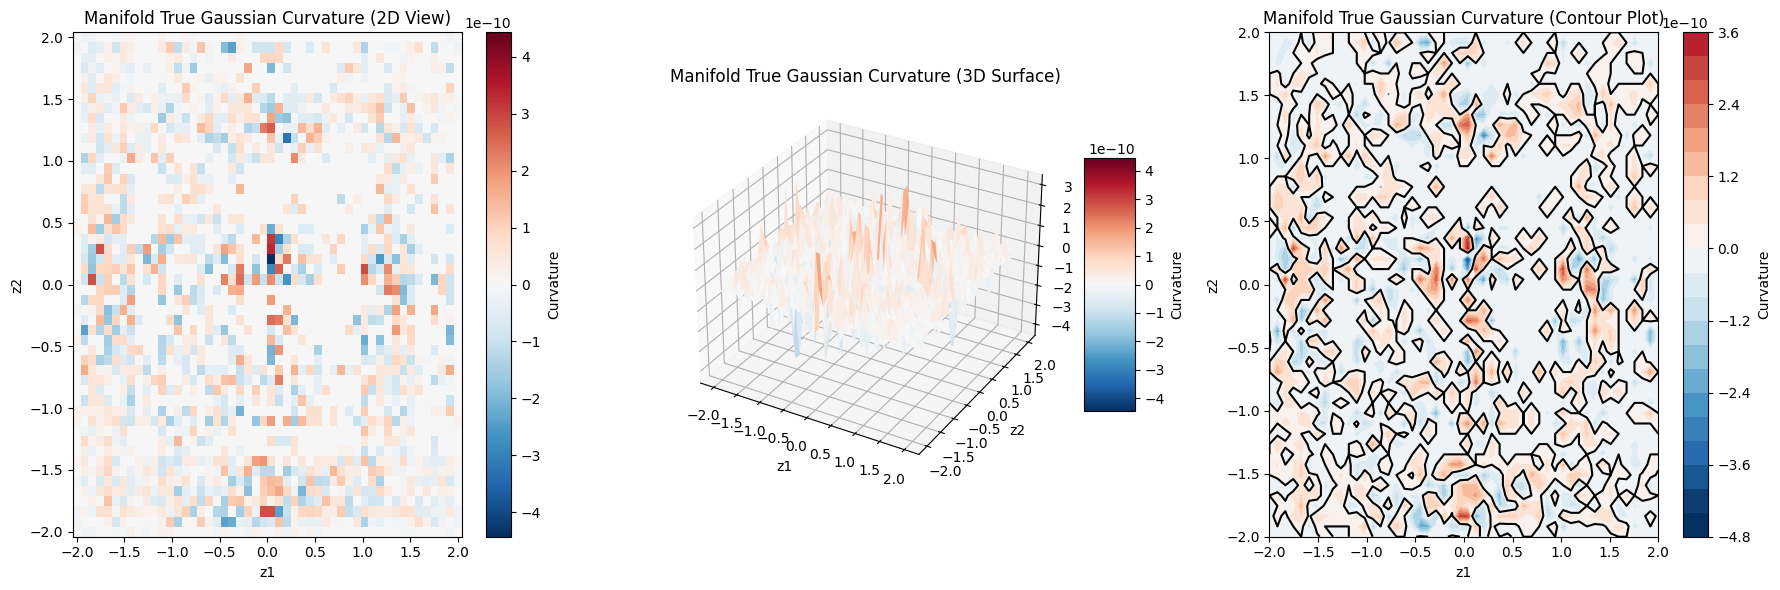


Plotting geodesics on Curved manifold curvature background:


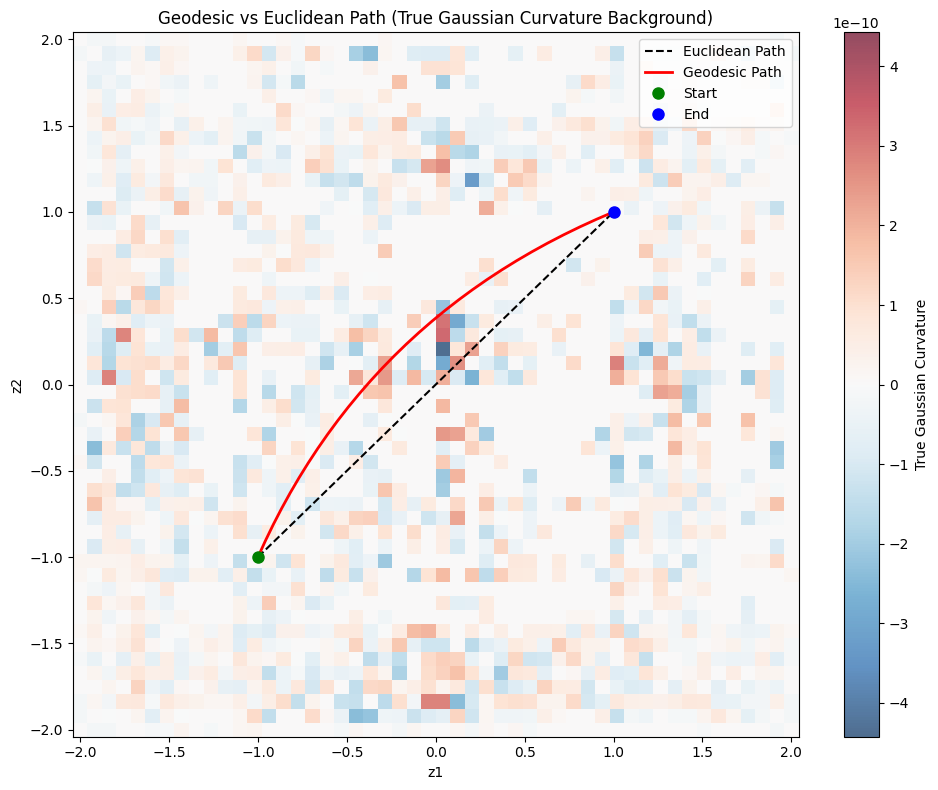


--- 3D Manifold without Caching (Old functionality check) ---
Manifold dimension: 3
Metric tensor at [0. 0. 0.]:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Metric tensor at [ 0.8 -0.2  0.5]:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Caching is not enabled for this manifold instance. Full grid computation skipped.


In [ ]:
# --- New: Test Visualization functions for Curved Manifold ---
print("\n" + "="*50)
print("--- Testing Visualization (Curved Metric) ---")
print("="*50)

# Visualize manifold curvature
print("\nVisualizing Curved manifold curvature:")
# Increased resolution for smoother visualization
vis_curvature_curved, Z1_curved, Z2_curved = manifold_2d_curved.visualize_manifold_curvature(resolution=50, h_curvature=1e-3)

# Plot geodesics
print("\nPlotting geodesics on Curved manifold curvature background:")
manifold_2d_curved.plot_geodesics(np.array([-1.0, -1.0]), np.array([1.0, 1.0]), vis_curvature_curved, Z1_curved, Z2_curved, num_points_geodesic=30)


In [ ]:
# --- New: Test Distance Approximation Methods ---
print("\n" + "="*50)
print("--- Testing Distance Approximation Methods ---")
print("="*50)

# Points for testing
p1_approx = np.array([0.1, 0.1])
p2_approx = np.array([0.9, 0.9])

print(f"\nDistances for Euclidean Manifold from {p1_approx} to {p2_approx}:")
# Using the Euclidean manifold instance
geo_dist = manifold_2d_euclidean._geodesic_distance(p1_approx, p2_approx)
print(f"  Geodesic Distance: {geo_dist:.4f}")
print(f"  Linear Interpolation Distance: {manifold_2d_euclidean.linear_interpolation_distance(p1_approx, p2_approx):.4f}")
print(f"  Midpoint Approximation: {manifold_2d_euclidean.midpoint_approximation(p1_approx, p2_approx):.4f}")
print(f"  Weighted Midpoint Approximation: {manifold_2d_euclidean.weighted_midpoint_approximation(p1_approx, p2_approx):.4f}")
print(f"  Endpoint Average Approximation: {manifold_2d_euclidean.endpoint_average_approximation(p1_approx, p2_approx):.4f}")
print(f"  Euclidean Distance (Baseline): {manifold_2d_euclidean.euclidean_distance(p1_approx, p2_approx):.4f}")

print(f"\nDistances for Curved Manifold from {p1_approx} to {p2_approx}:")
# Using the Curved manifold instance
geo_dist_curved = manifold_2d_curved._geodesic_distance(p1_approx, p2_approx)
print(f"  Geodesic Distance: {geo_dist_curved:.4f}")
print(f"  Linear Interpolation Distance: {manifold_2d_curved.linear_interpolation_distance(p1_approx, p2_approx):.4f}")
print(f"  Midpoint Approximation: {manifold_2d_curved.midpoint_approximation(p1_approx, p2_approx):.4f}")
print(f"  Weighted Midpoint Approximation: {manifold_2d_curved.weighted_midpoint_approximation(p1_approx, p2_approx):.4f}")
print(f"  Endpoint Average Approximation: {manifold_2d_curved.endpoint_average_approximation(p1_approx, p2_approx):.4f}")
print(f"  Euclidean Distance (Baseline): {manifold_2d_curved.euclidean_distance(p1_approx, p2_approx):.4f}")



--- Testing Distance Approximation Methods ---

Distances for Euclidean Manifold from [0.1 0.1] to [0.9 0.9]:
  Geodesic Distance: 1.2262
  Linear Interpolation Distance: 1.1314
  Midpoint Approximation: 1.1314
  Weighted Midpoint Approximation: 1.1314
  Endpoint Average Approximation: 1.1314
  Euclidean Distance (Baseline): 1.1314

Distances for Curved Manifold from [0.1 0.1] to [0.9 0.9]:
  Geodesic Distance: 1.4817
  Linear Interpolation Distance: 1.3815
  Midpoint Approximation: 1.3856
  Weighted Midpoint Approximation: 1.3814
  Endpoint Average Approximation: 1.3856
  Euclidean Distance (Baseline): 1.1314

--- 3D Manifold without Caching (Old functionality check) ---
Manifold dimension: 3
Metric tensor at [0. 0. 0.]:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Metric tensor at [ 0.8 -0.2  0.5]:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Caching is not enabled for this manifold instance. Full grid computation skipped.


--- Setting up Euclidean Manifold Experiment ---
Computing metric tensors for 400 grid points...
Full grid metric tensor computation complete.

--- Running Euclidean Manifold Experiment ---
Testing 15 point pairs on Euclidean manifold...

=== Results Summary for Euclidean Manifold ===
Method               MAE        Max AE     MRE        Max RE     RMSE       Time (ms)   
--------------------------------------------------------------------------------------------
linear_interpolation 0.2845     0.4761     0.3308     0.5939     0.3178     2.8462      
midpoint             0.2845     0.4761     0.3308     0.5939     0.3178     0.0340      
weighted_midpoint    0.2845     0.4761     0.3308     0.5939     0.3178     0.0883      
endpoint_average     0.2845     0.4761     0.3308     0.5939     0.3178     0.0639      
euclidean            0.2845     0.4761     0.3308     0.5939     0.3178     0.0059      
Generating manifold curvature visualization...


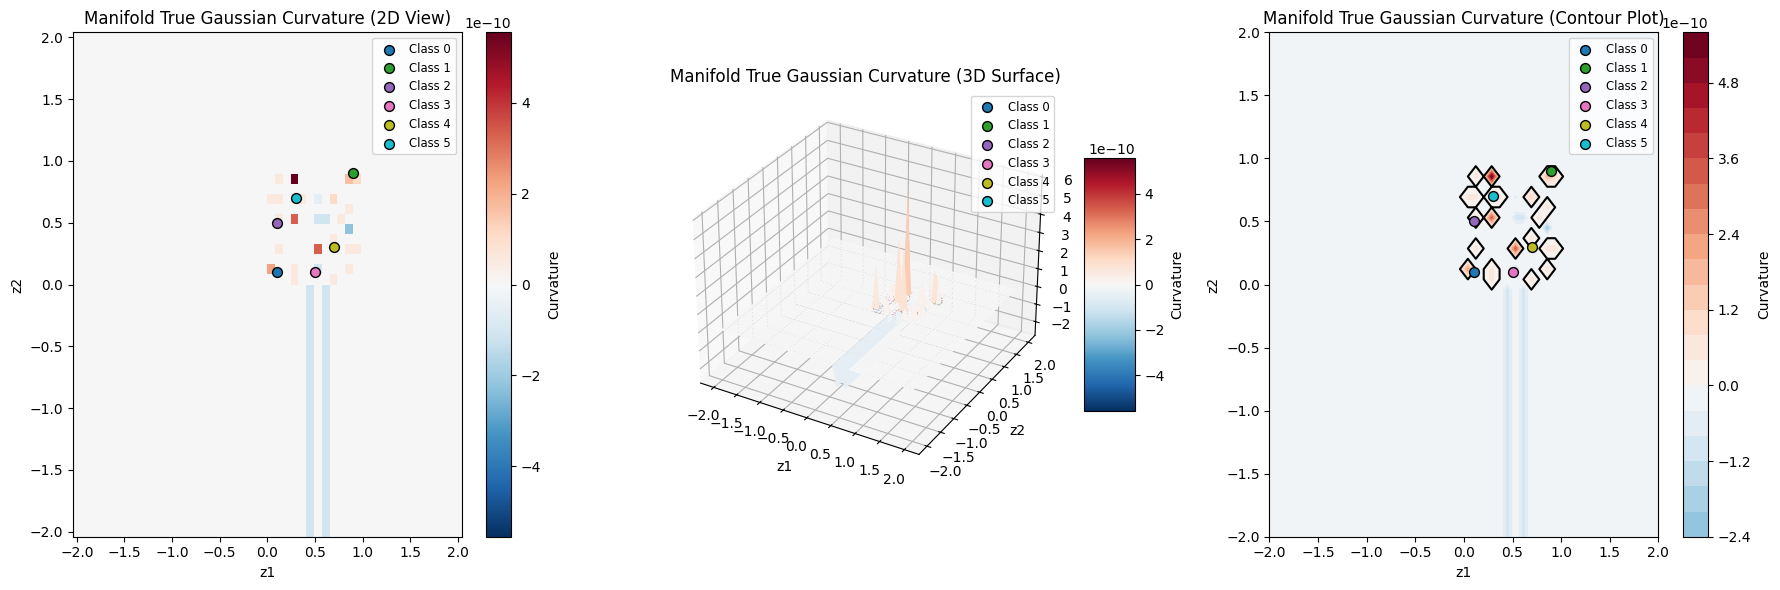

/var/folders/qc/fbm2wz190nqd87d2mq7l90_80000gn/T/ipykernel_73664/138407756.py:249: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(error_data, labels=labels_list)


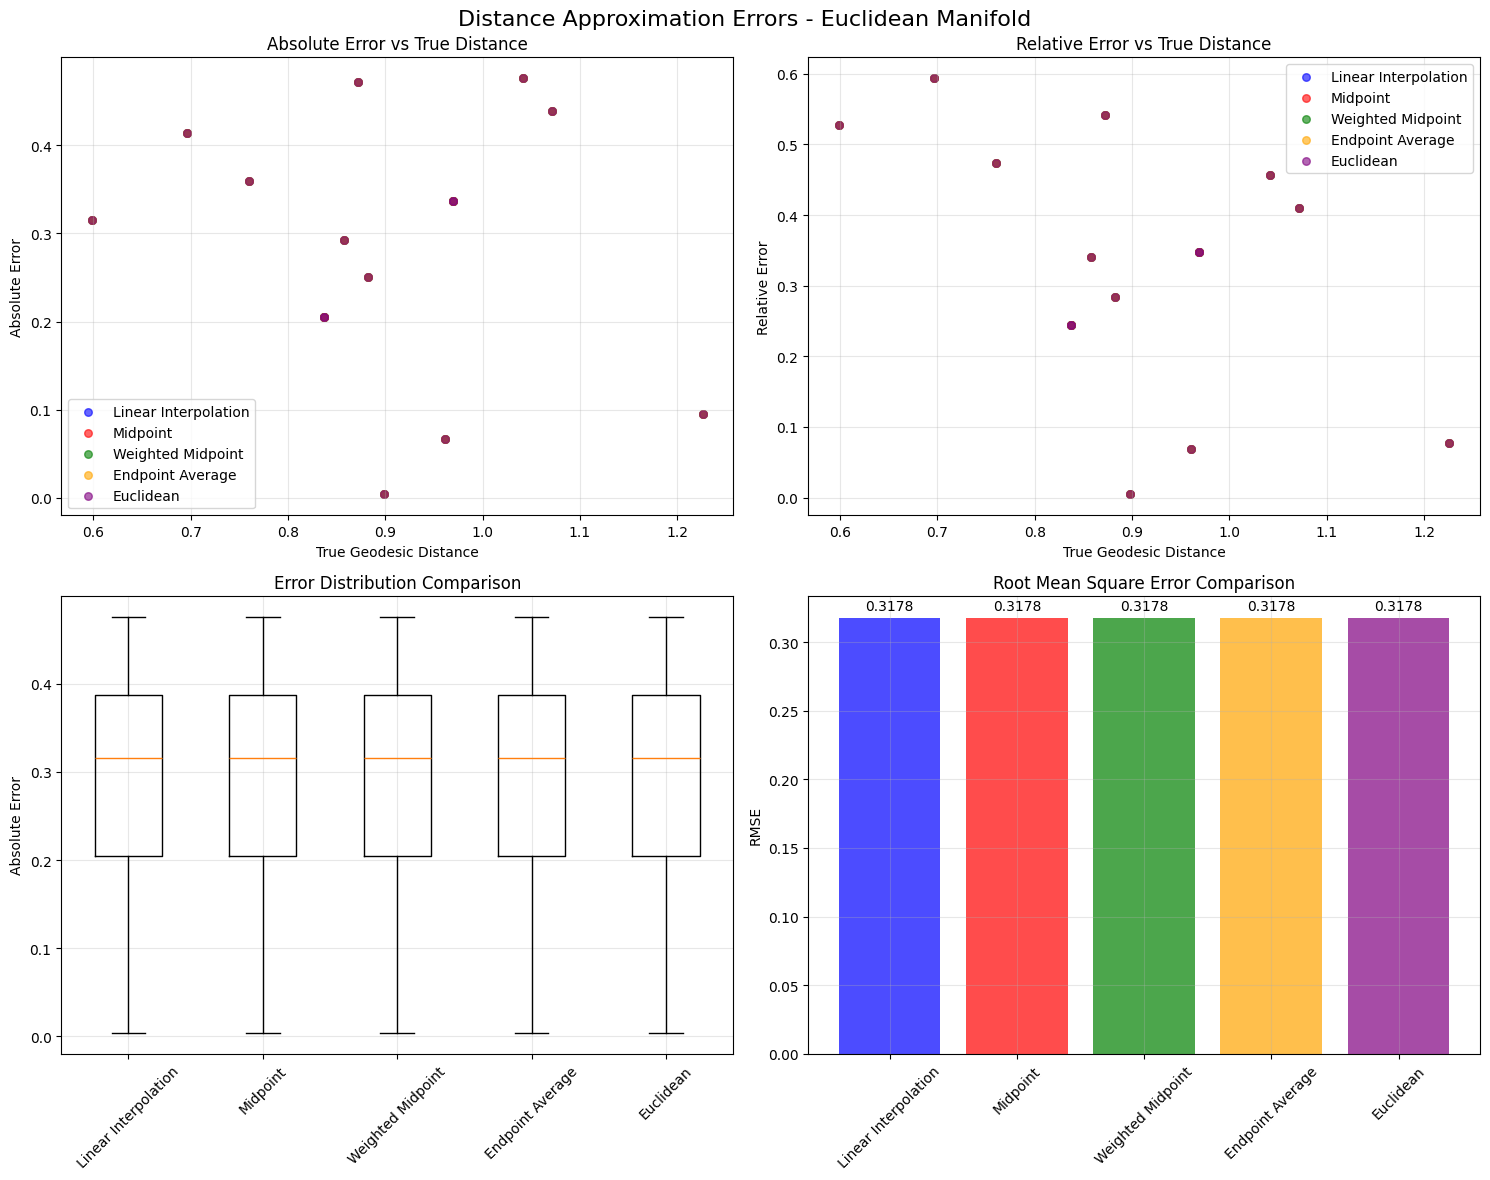

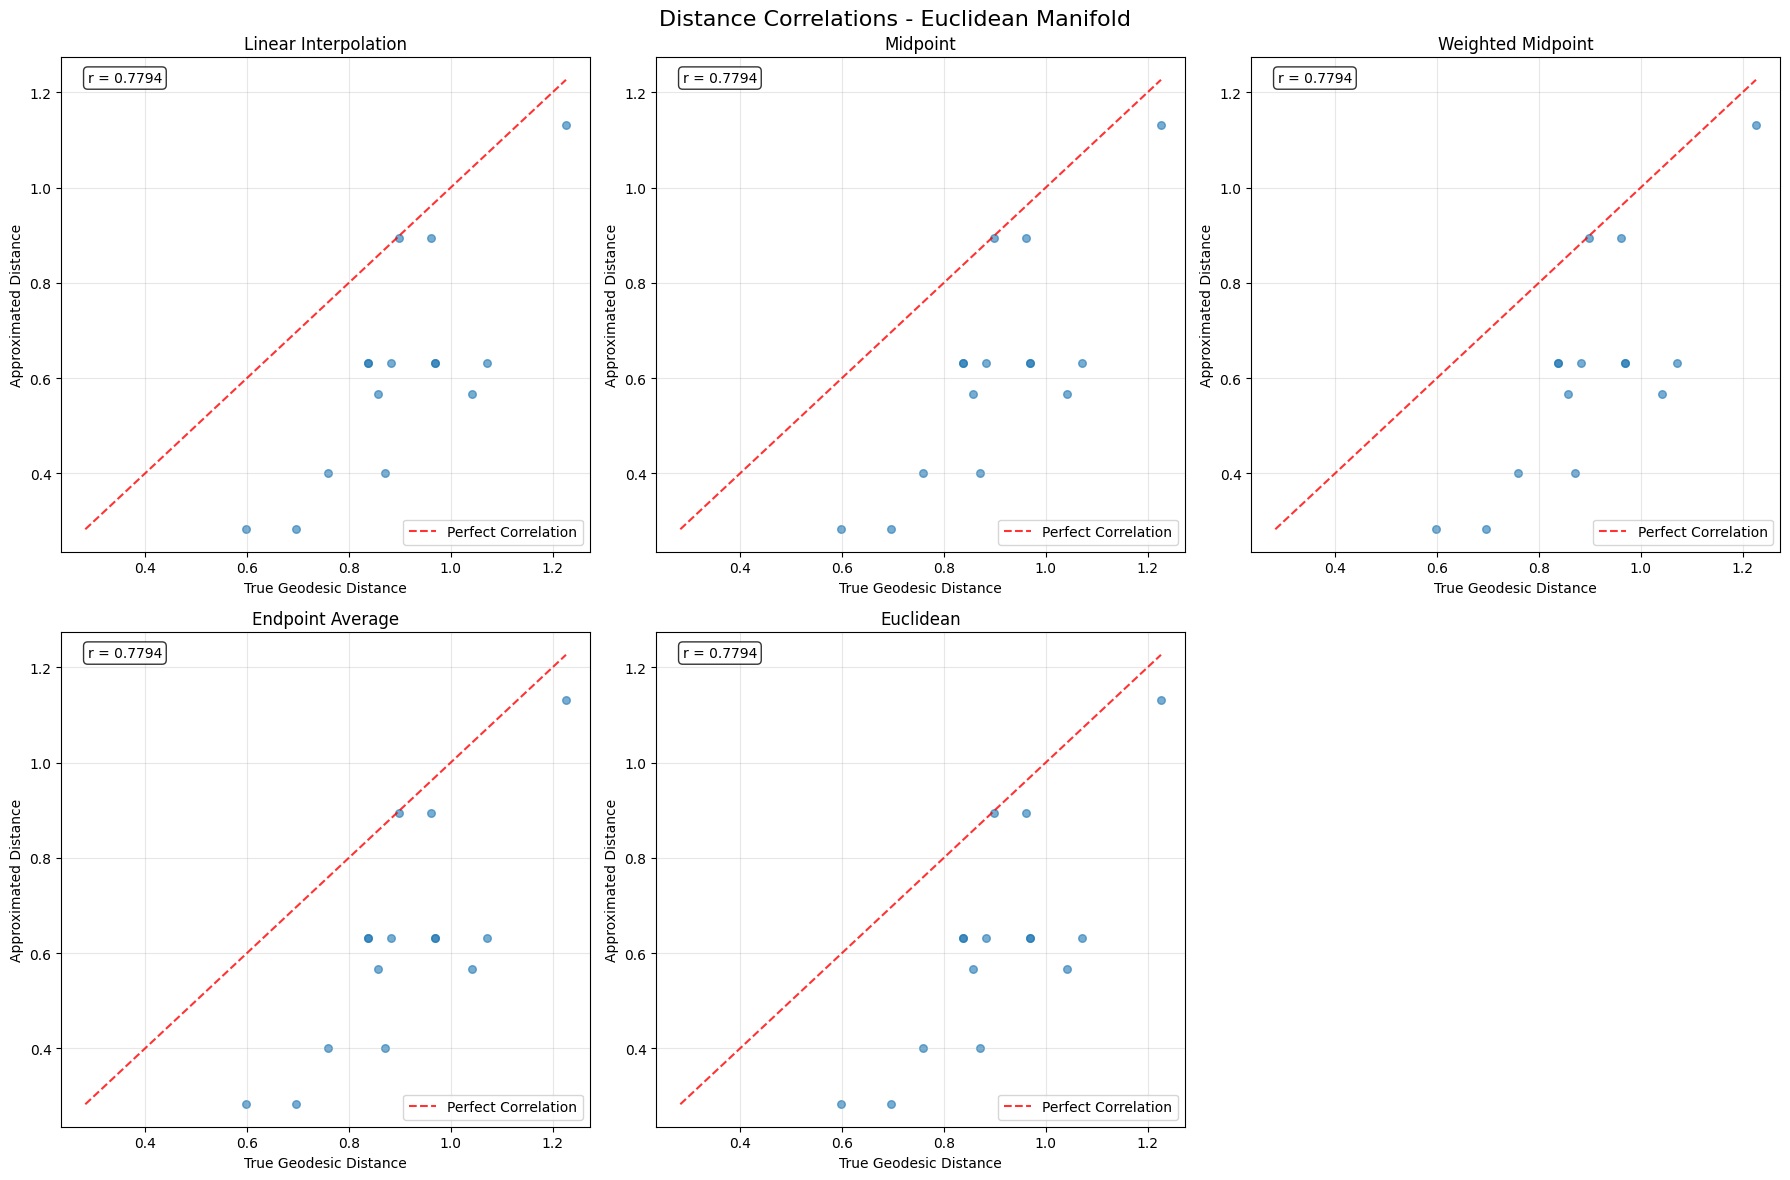

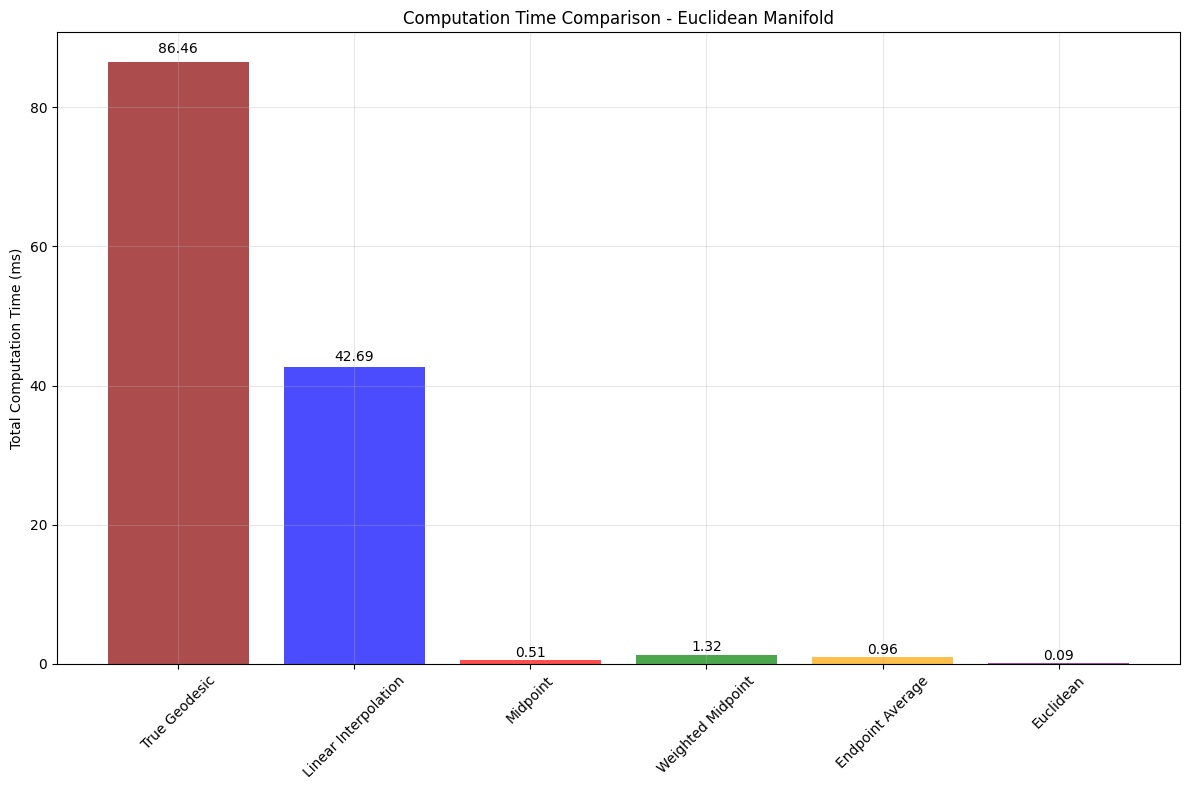

Generating example geodesic visualization...


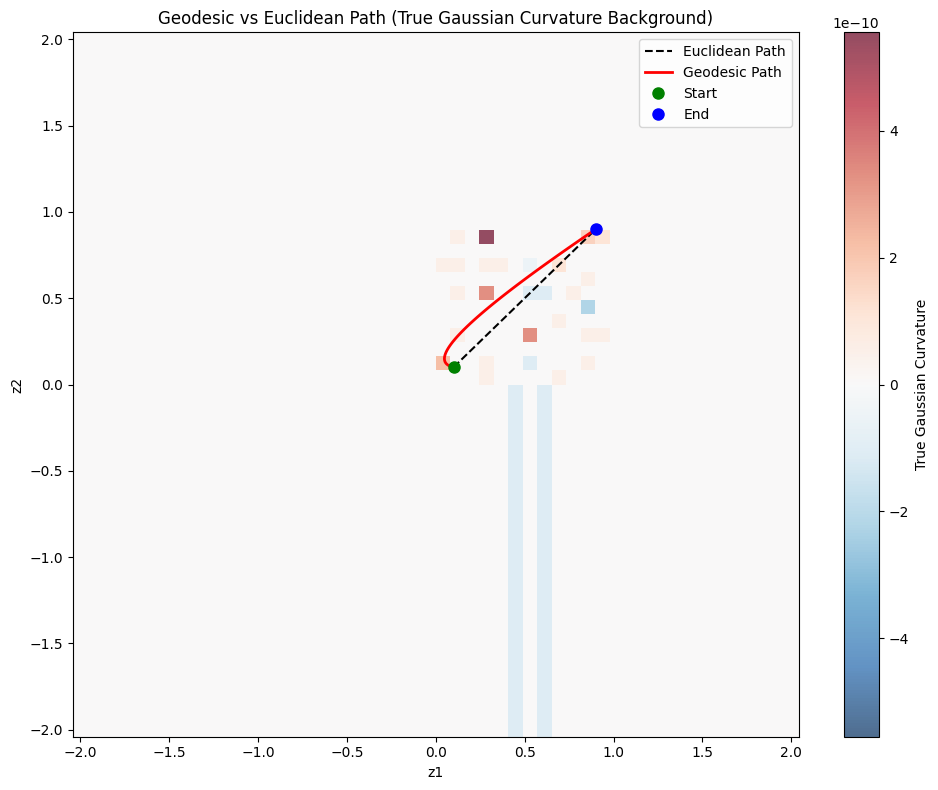


Euclidean Experiment Results:
 {'linear_interpolation': {'mean_absolute_error': np.float64(0.28449723016195605), 'max_absolute_error': np.float64(0.4760726758959669), 'mean_relative_error': np.float64(0.3308256976925564), 'max_relative_error': np.float64(0.5939406820541625), 'rmse': np.float64(0.3177764109312953), 'mean_computation_time': 0.002846225102742513}, 'midpoint': {'mean_absolute_error': np.float64(0.28449723016195605), 'max_absolute_error': np.float64(0.4760726758959668), 'mean_relative_error': np.float64(0.3308256976925563), 'max_relative_error': np.float64(0.5939406820541625), 'rmse': np.float64(0.3177764109312952), 'mean_computation_time': 3.399848937988281e-05}, 'weighted_midpoint': {'mean_absolute_error': np.float64(0.2844972301619561), 'max_absolute_error': np.float64(0.4760726758959668), 'mean_relative_error': np.float64(0.3308256976925564), 'max_relative_error': np.float64(0.5939406820541625), 'rmse': np.float64(0.31777641093129533), 'mean_computation_time': 8.829434

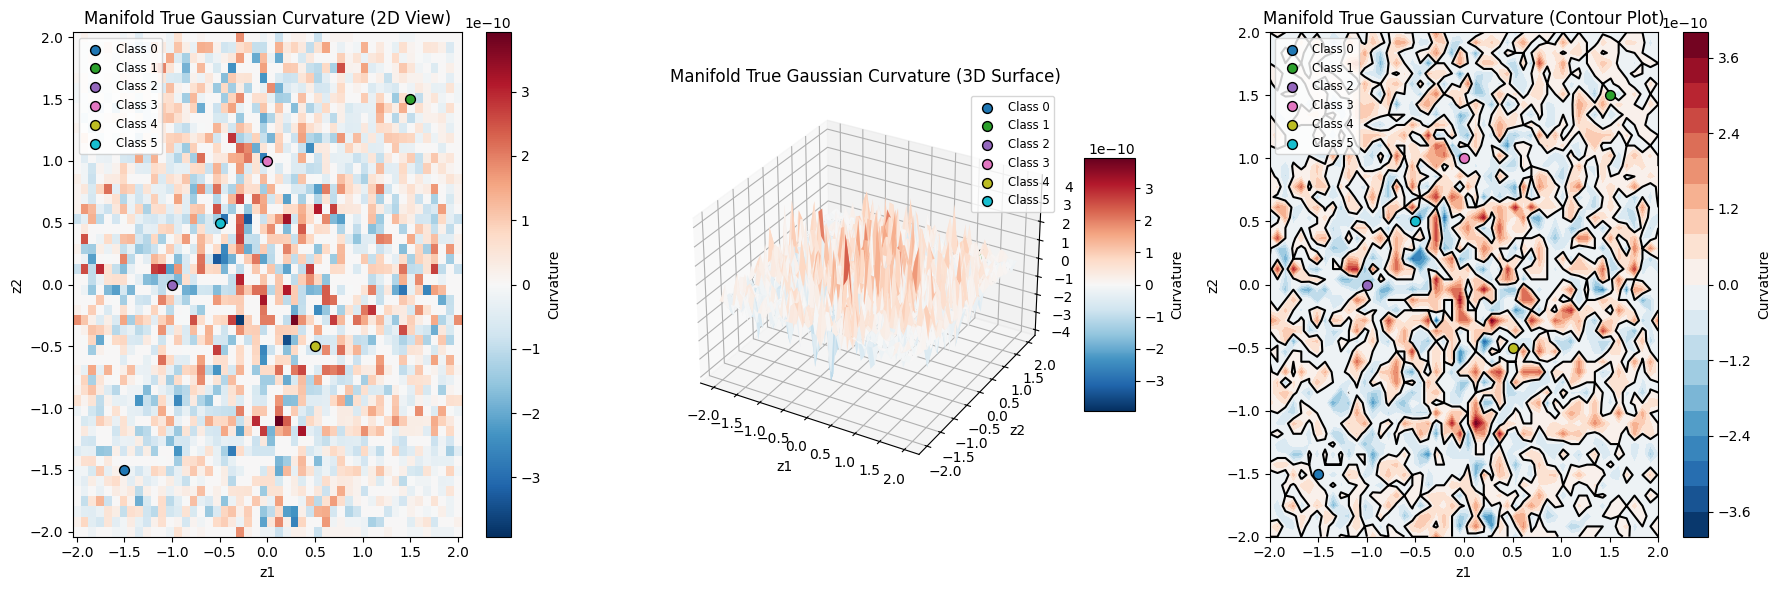

/var/folders/qc/fbm2wz190nqd87d2mq7l90_80000gn/T/ipykernel_73664/138407756.py:249: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(error_data, labels=labels_list)


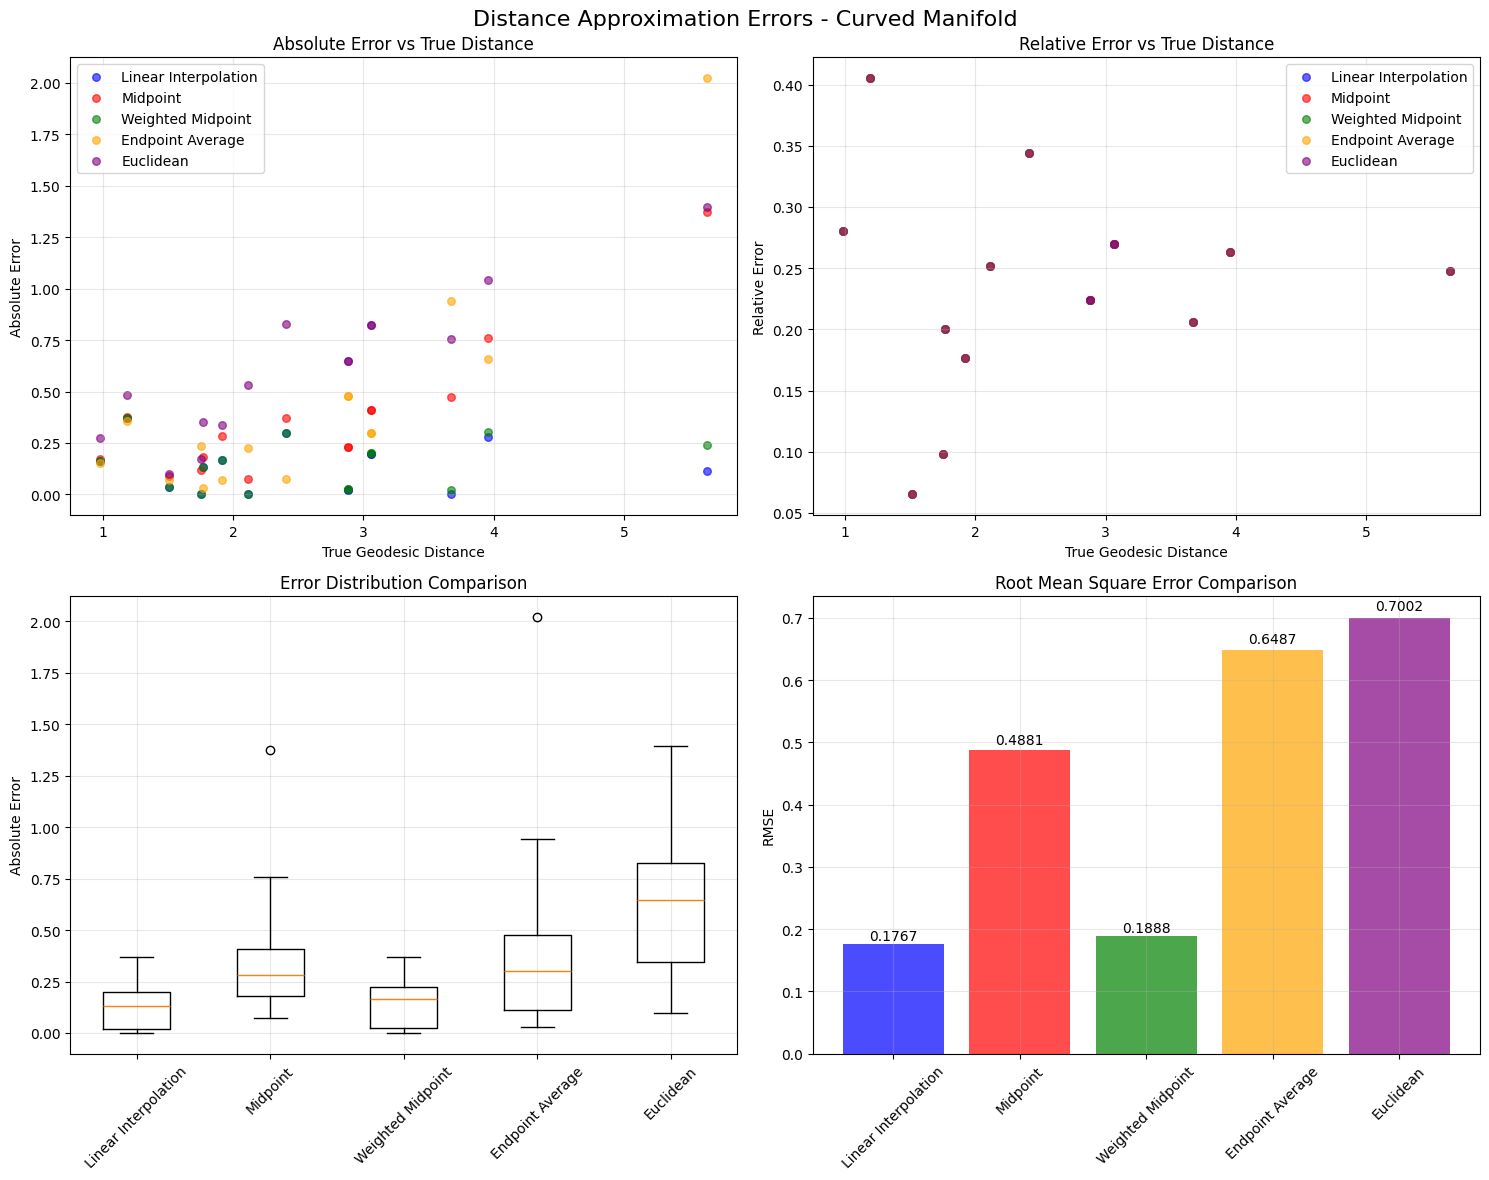

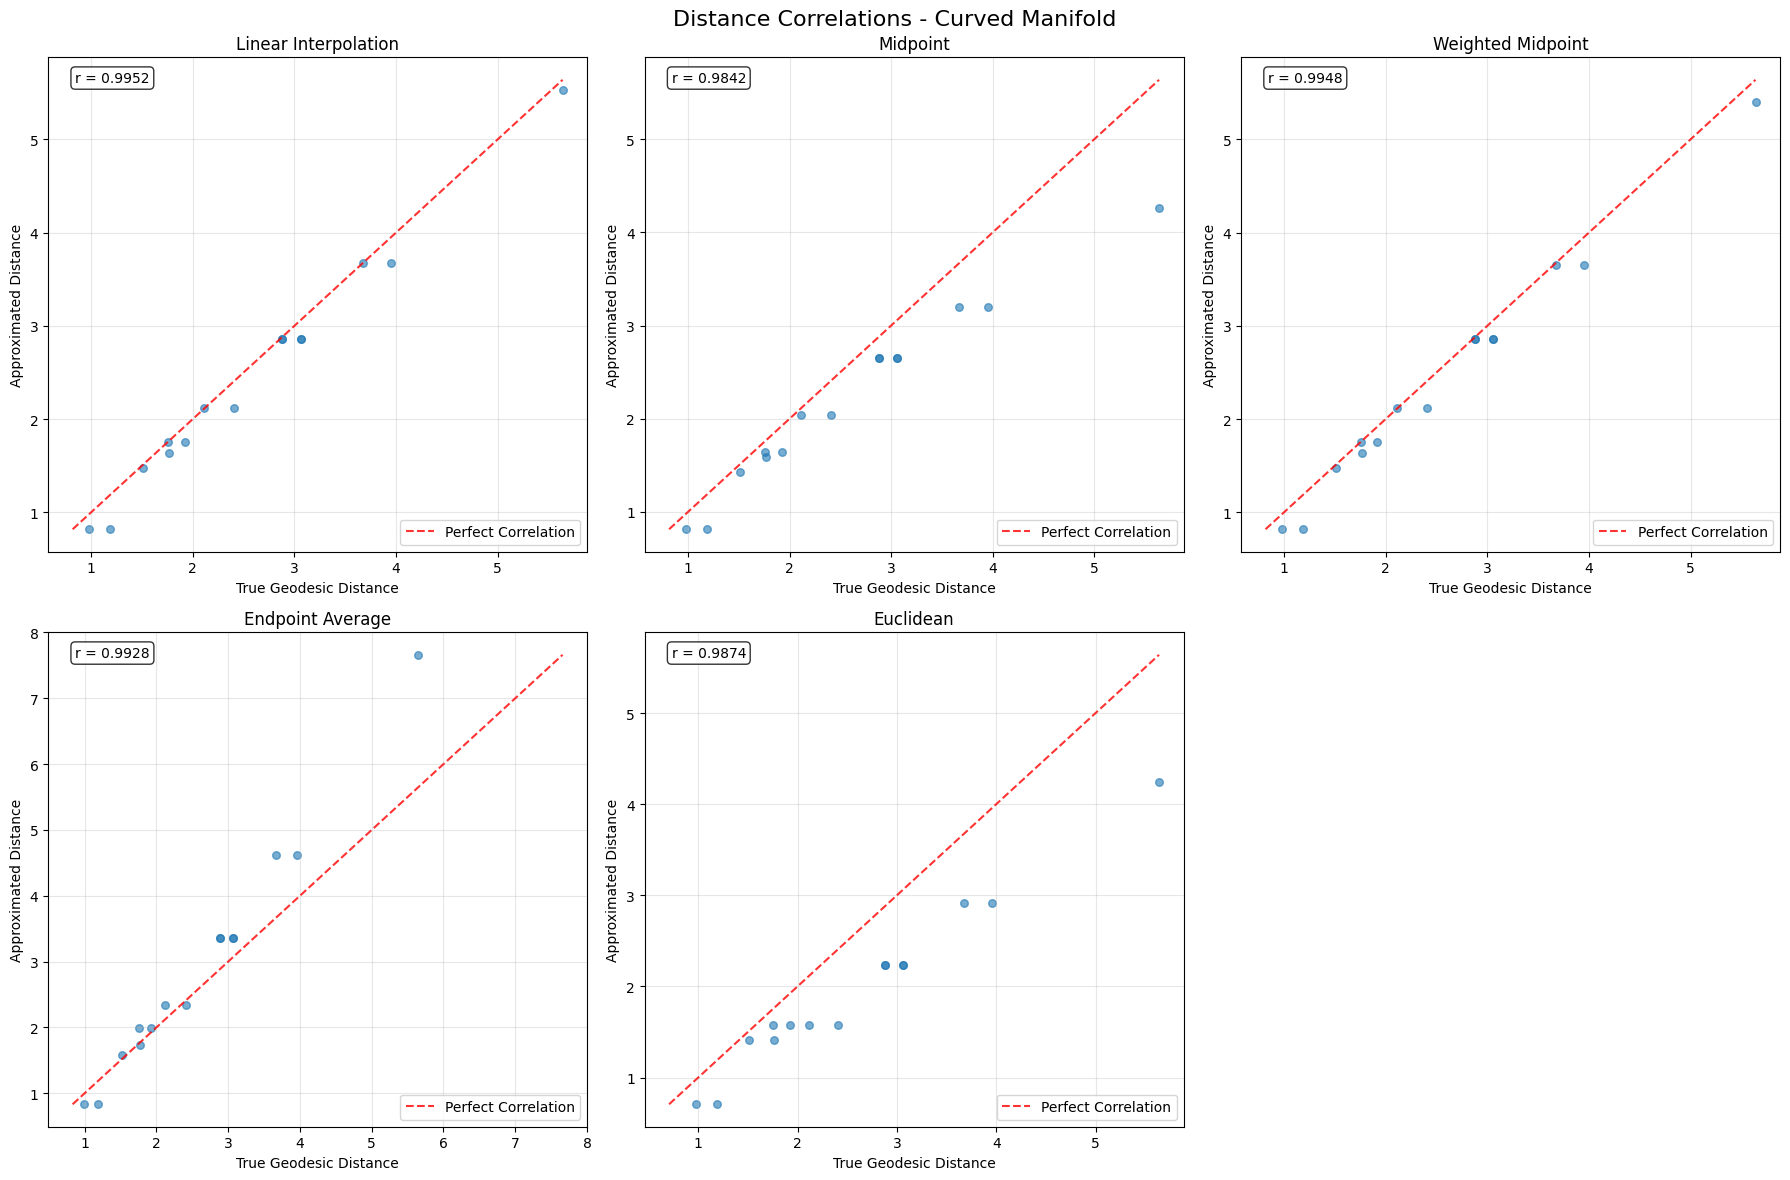

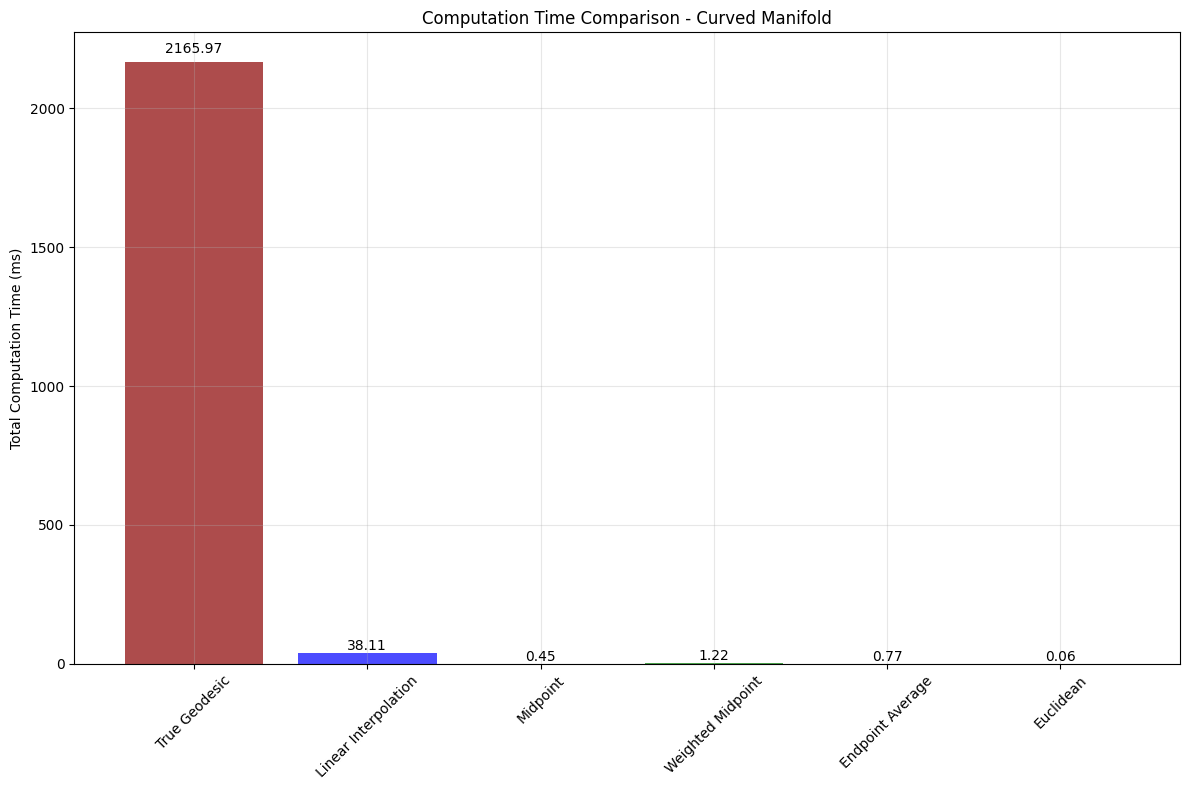

Generating example geodesic visualization...


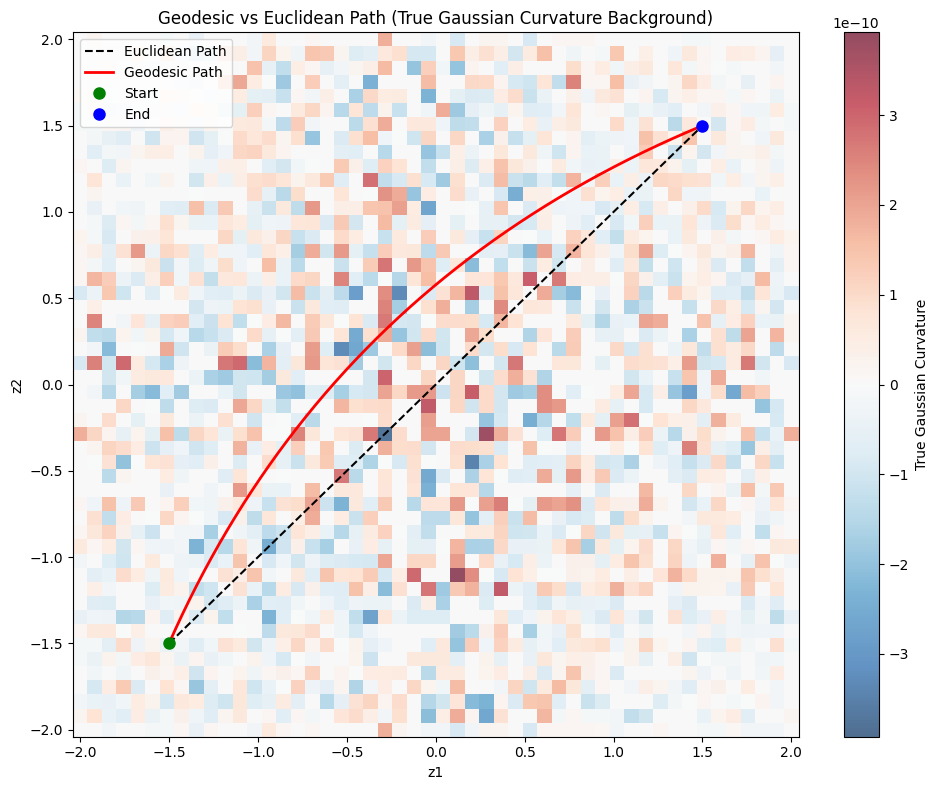


Curved Experiment Results:
 {'linear_interpolation': {'mean_absolute_error': np.float64(0.133120503087318), 'max_absolute_error': np.float64(0.3704983007606534), 'mean_relative_error': np.float64(0.06810327350790625), 'max_relative_error': np.float64(0.31163096257851713), 'rmse': np.float64(0.17670260758122108), 'mean_computation_time': 0.002540413538614909}, 'midpoint': {'mean_absolute_error': np.float64(0.36998183105718047), 'max_absolute_error': np.float64(1.3725324524555855), 'mean_relative_error': np.float64(0.1365555662772165), 'max_relative_error': np.float64(0.3170494513829265), 'rmse': np.float64(0.48812990187394173), 'mean_computation_time': 3.018379211425781e-05}, 'weighted_midpoint': {'mean_absolute_error': np.float64(0.1462026986166243), 'max_absolute_error': np.float64(0.37077373484433296), 'mean_relative_error': np.float64(0.07105214637180882), 'max_relative_error': np.float64(0.31186263378577445), 'rmse': np.float64(0.18875129961042553), 'mean_computation_time': 8.1650

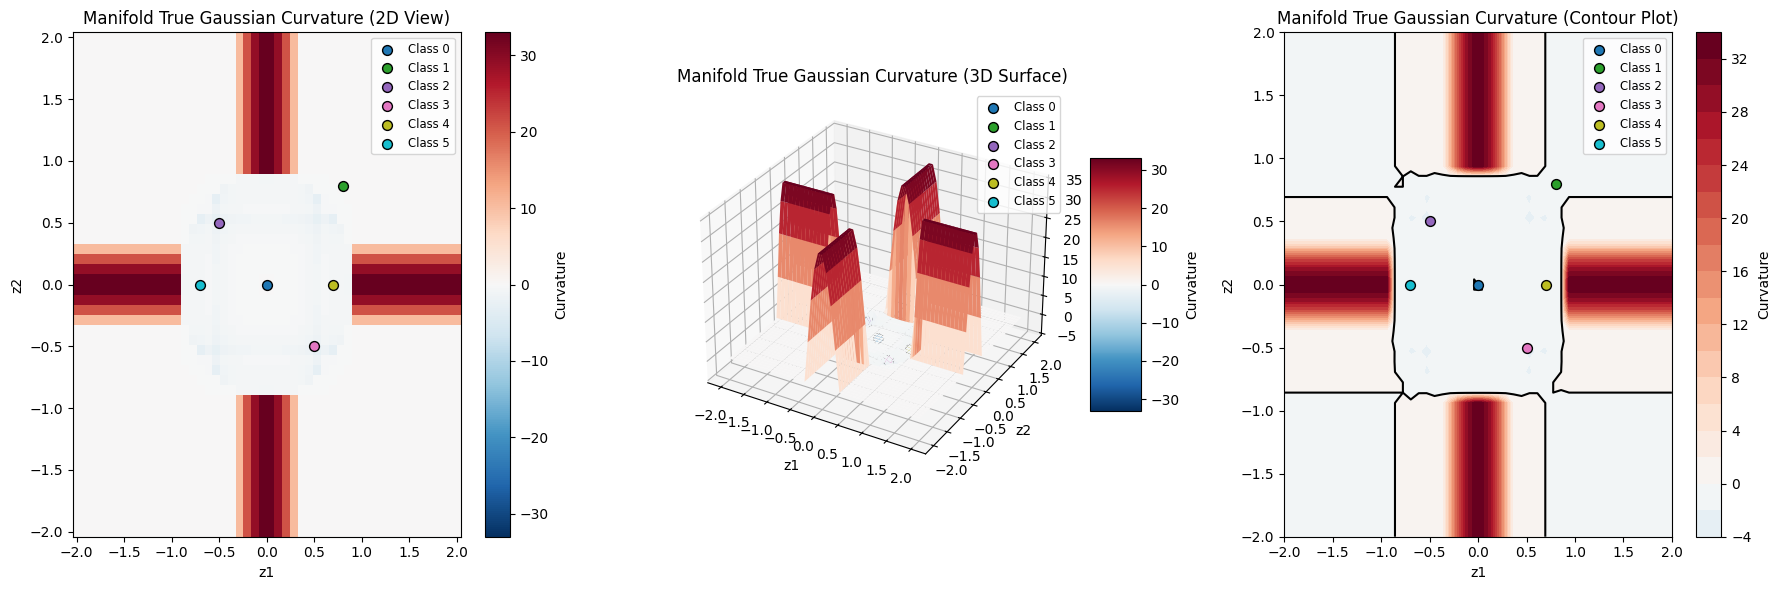

/var/folders/qc/fbm2wz190nqd87d2mq7l90_80000gn/T/ipykernel_73664/138407756.py:249: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(error_data, labels=labels_list)


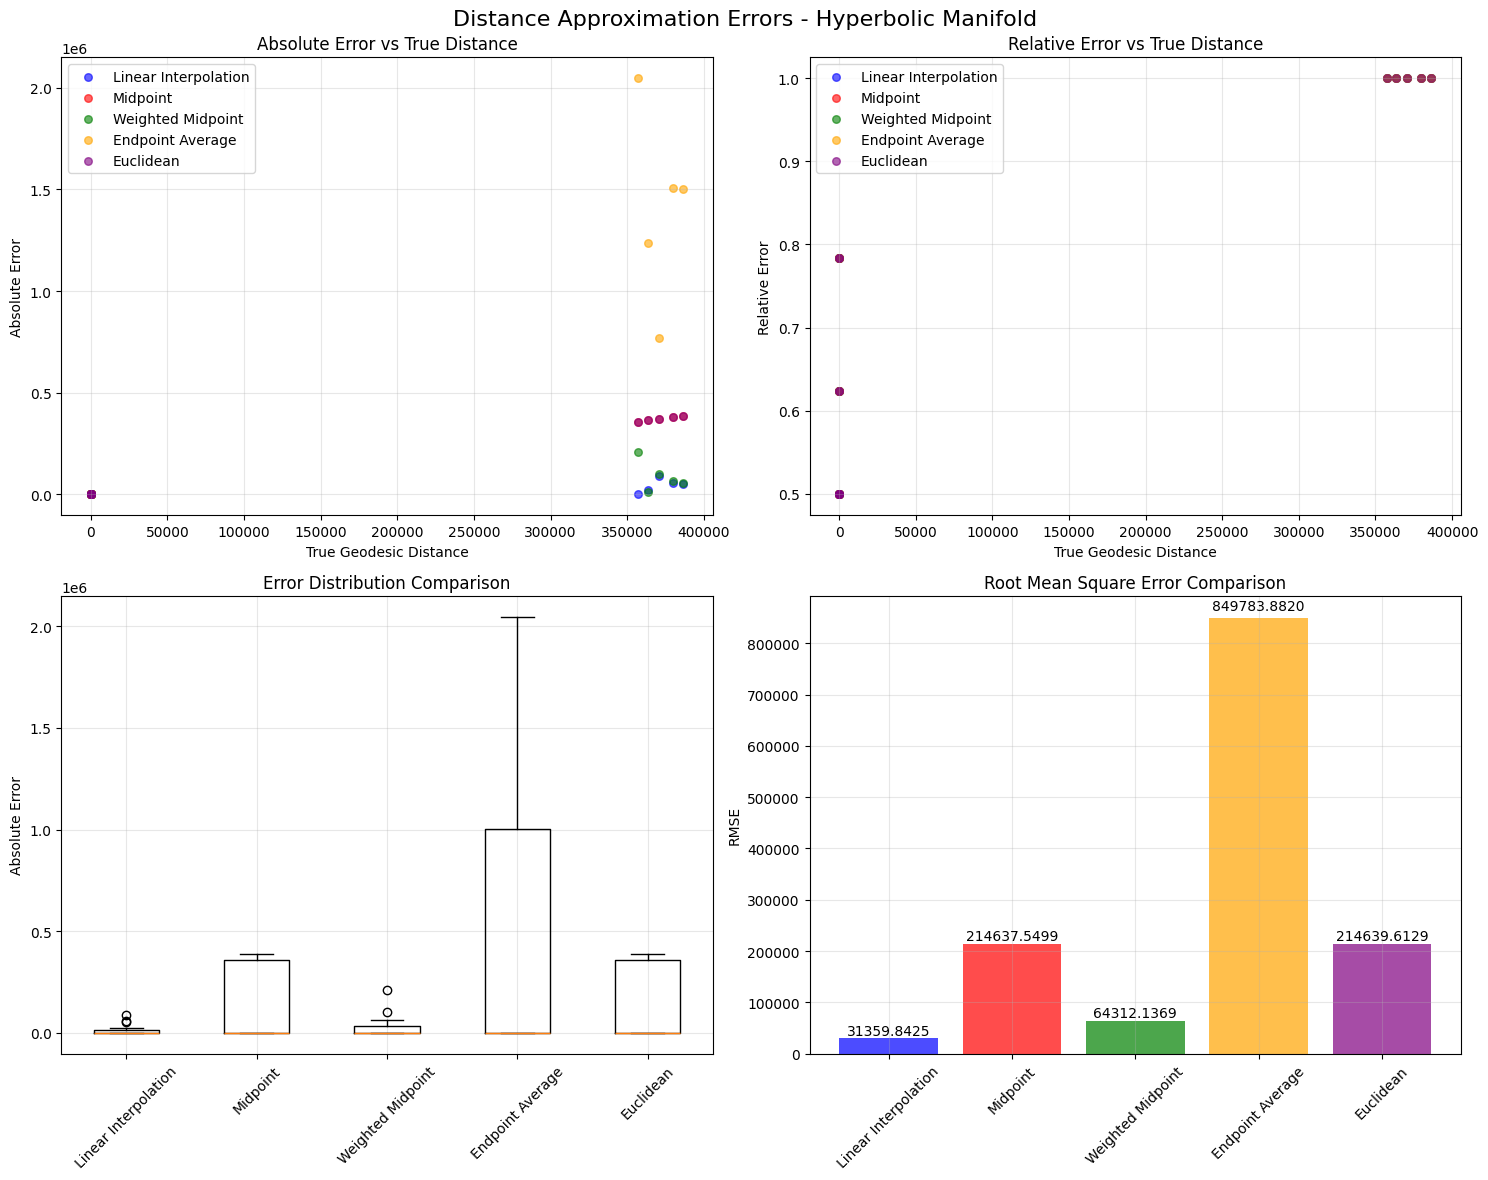

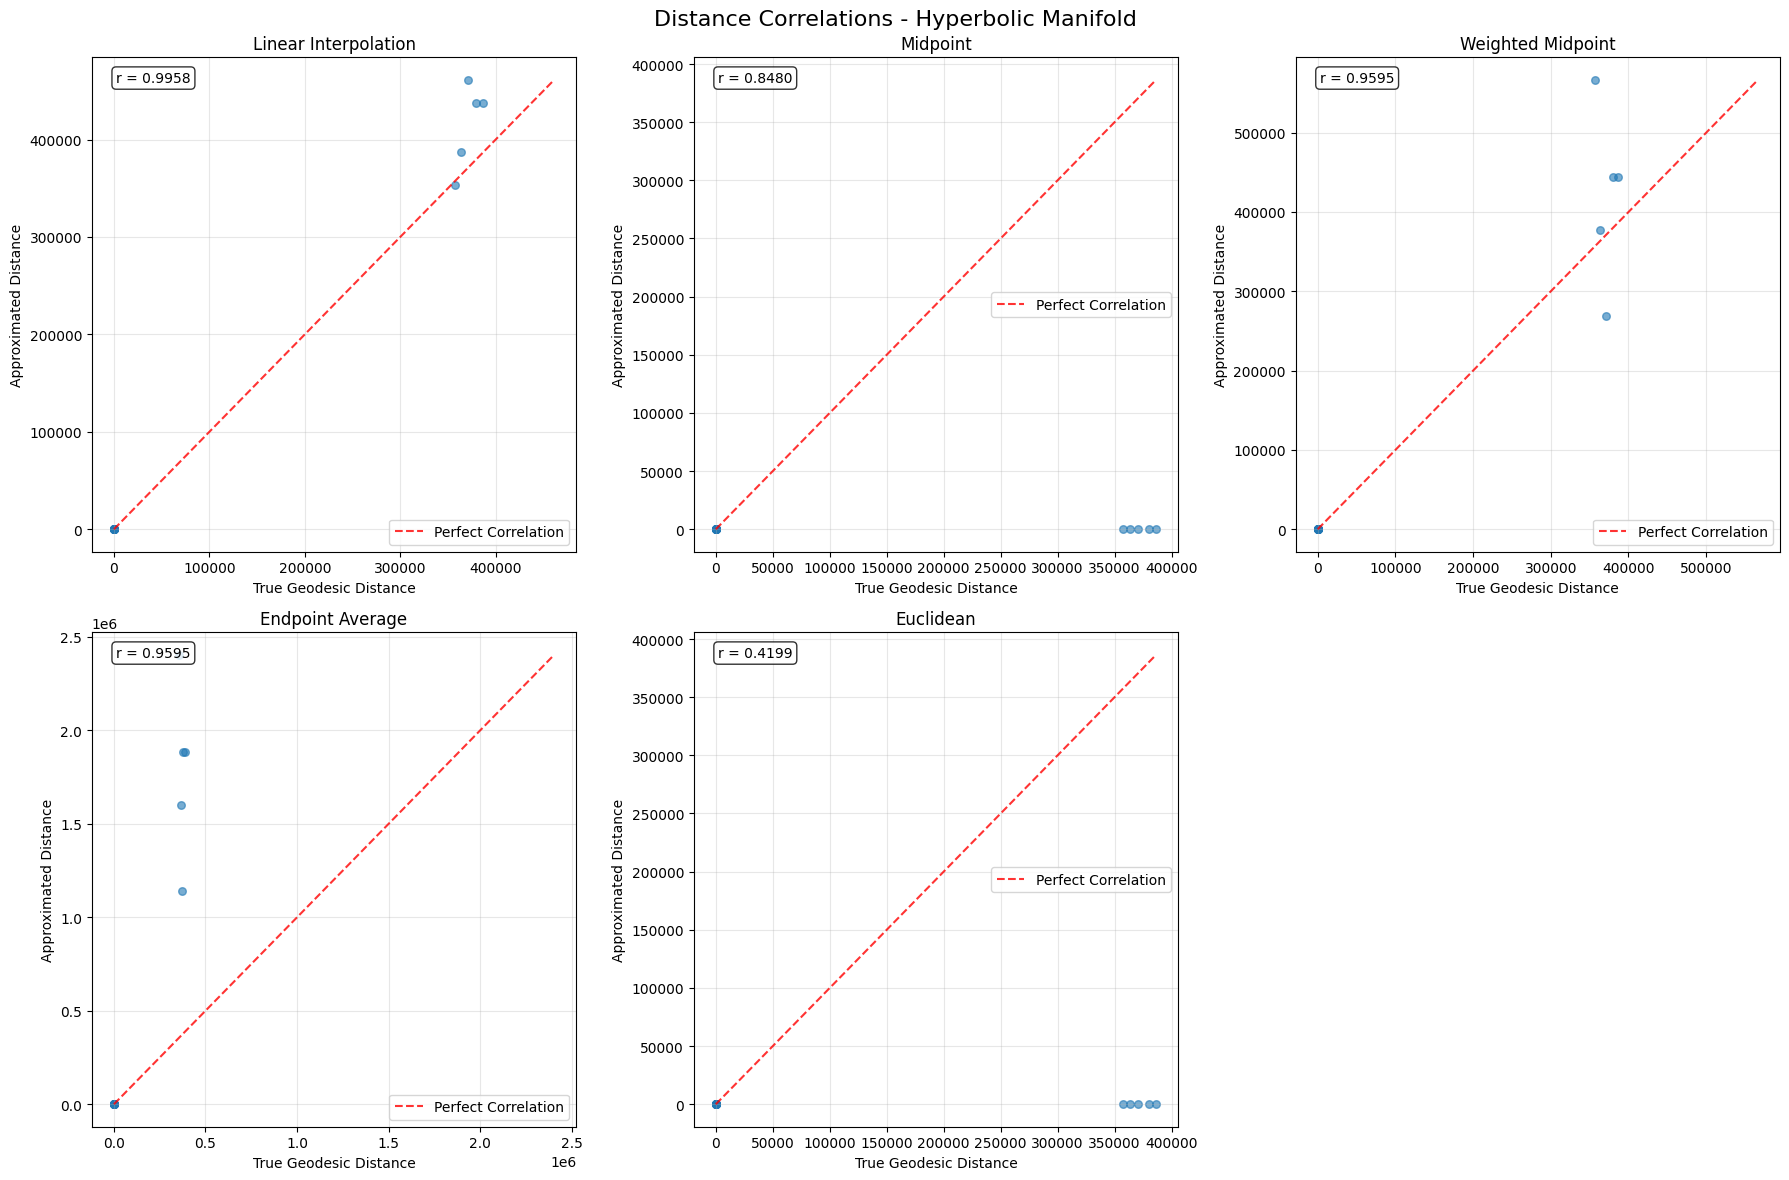

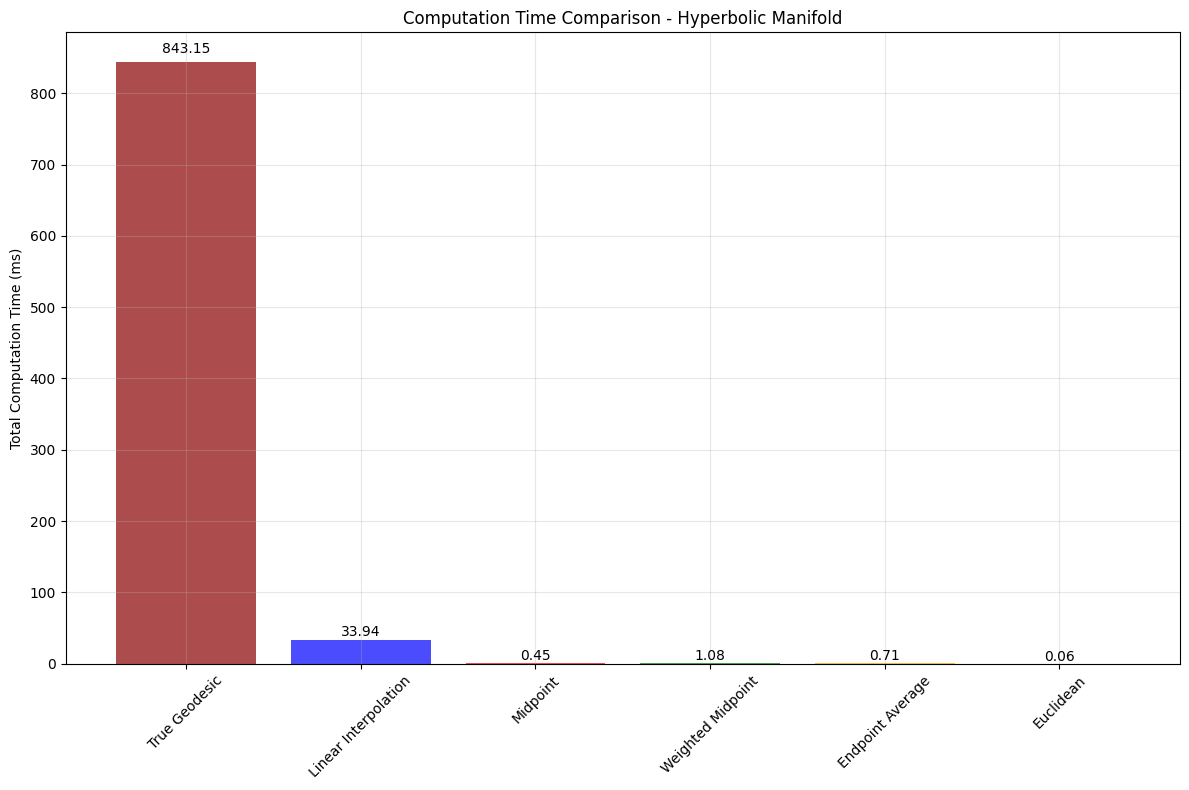

Generating example geodesic visualization...


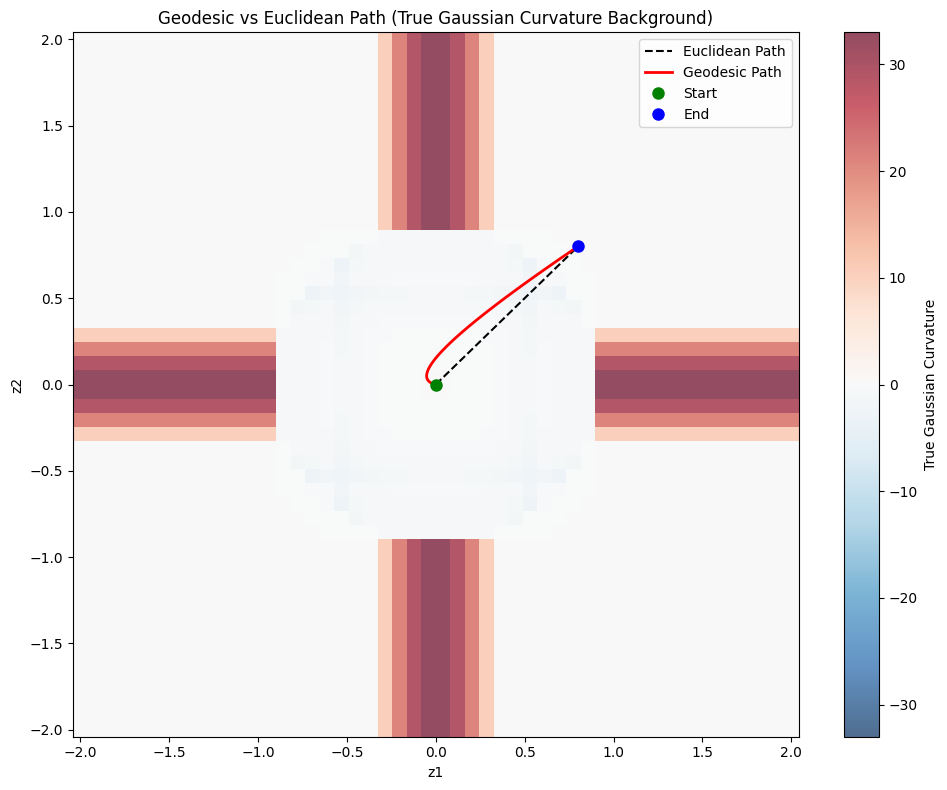


Hyperbolic Experiment Results:
 {'linear_interpolation': {'mean_absolute_error': np.float64(15131.180125699371), 'max_absolute_error': np.float64(90444.64998535137), 'mean_relative_error': np.float64(0.17025942258392007), 'max_relative_error': np.float64(0.25935492899700086), 'rmse': np.float64(31359.84254406479), 'mean_computation_time': 0.0022624969482421876}, 'midpoint': {'mean_absolute_error': np.float64(123871.27011639302), 'max_absolute_error': np.float64(386438.19095822435), 'mean_relative_error': np.float64(0.43067832690330615), 'max_relative_error': np.float64(0.9999907404030505), 'rmse': np.float64(214637.54985040223), 'mean_computation_time': 2.9913584391276042e-05}, 'weighted_midpoint': {'mean_absolute_error': np.float64(29874.24026079449), 'max_absolute_error': np.float64(209360.20561199798), 'mean_relative_error': np.float64(0.23236209405229521), 'max_relative_error': np.float64(0.585933856630329), 'rmse': np.float64(64312.13691247787), 'mean_computation_time': 7.1859359

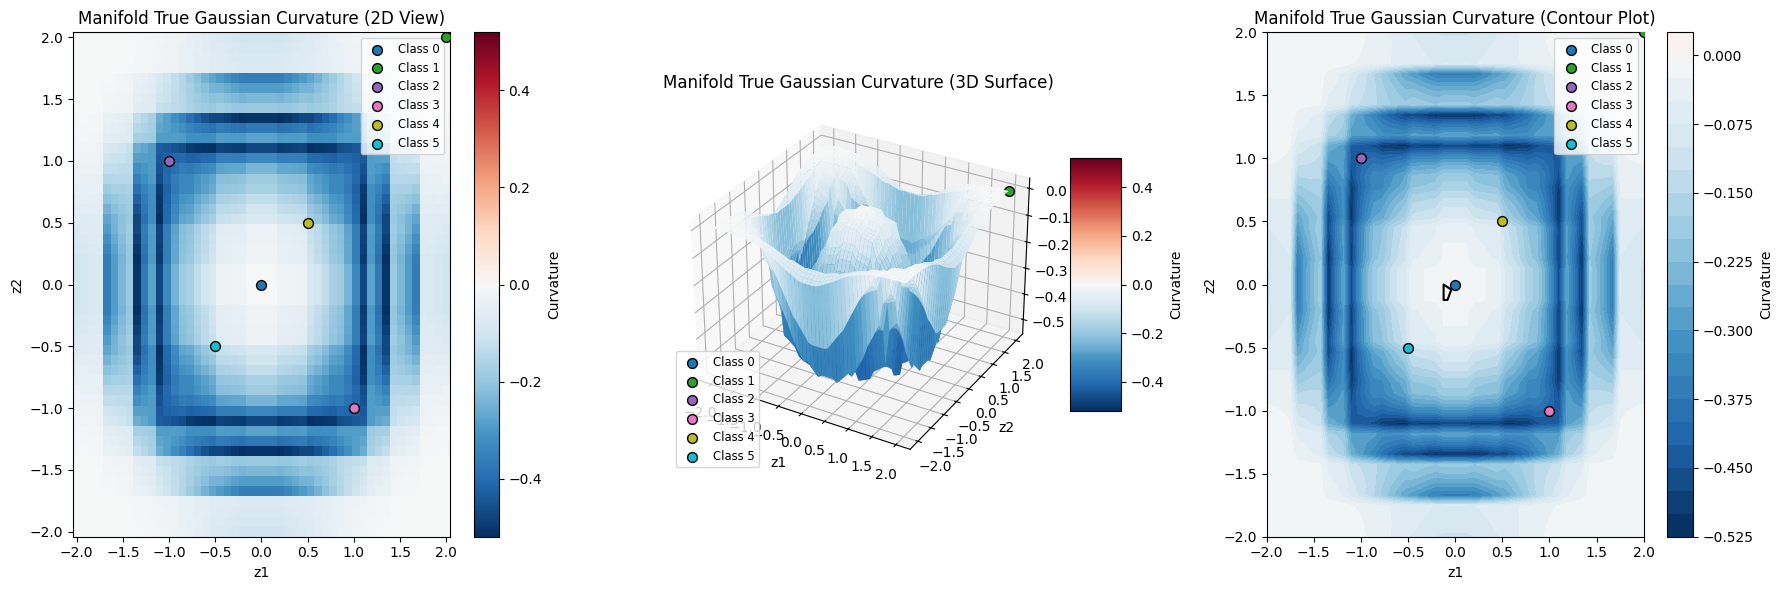

/var/folders/qc/fbm2wz190nqd87d2mq7l90_80000gn/T/ipykernel_73664/138407756.py:249: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(error_data, labels=labels_list)


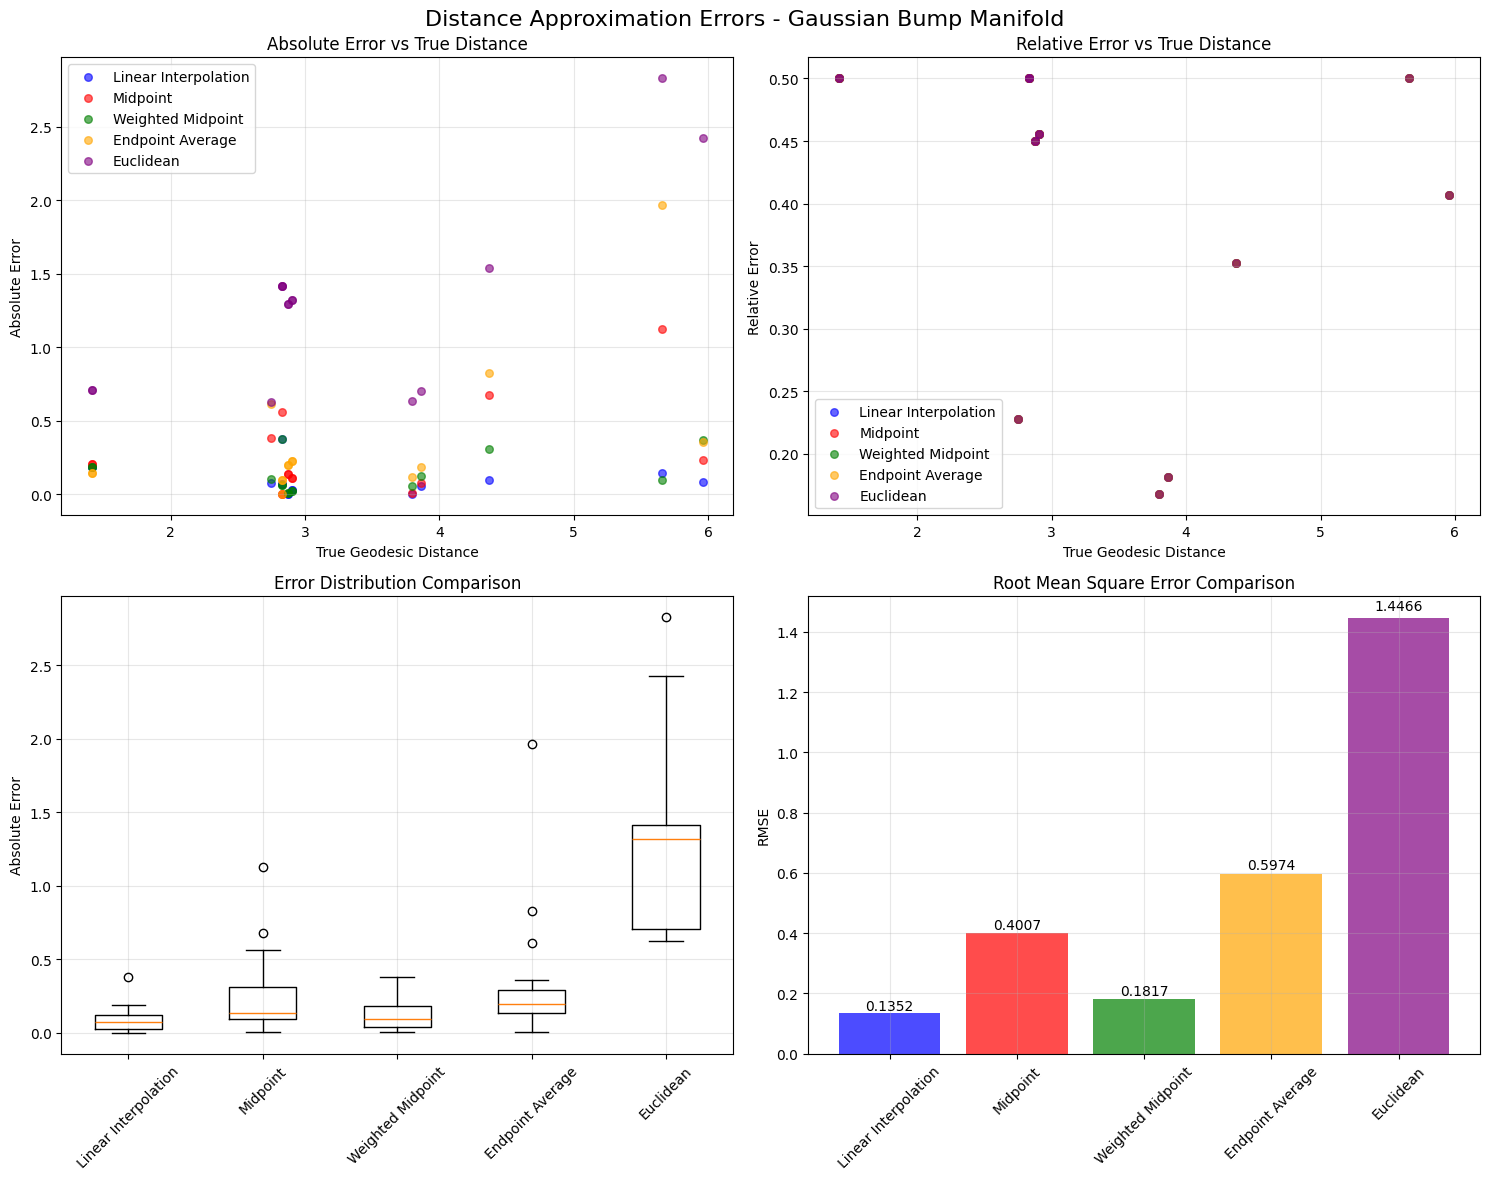

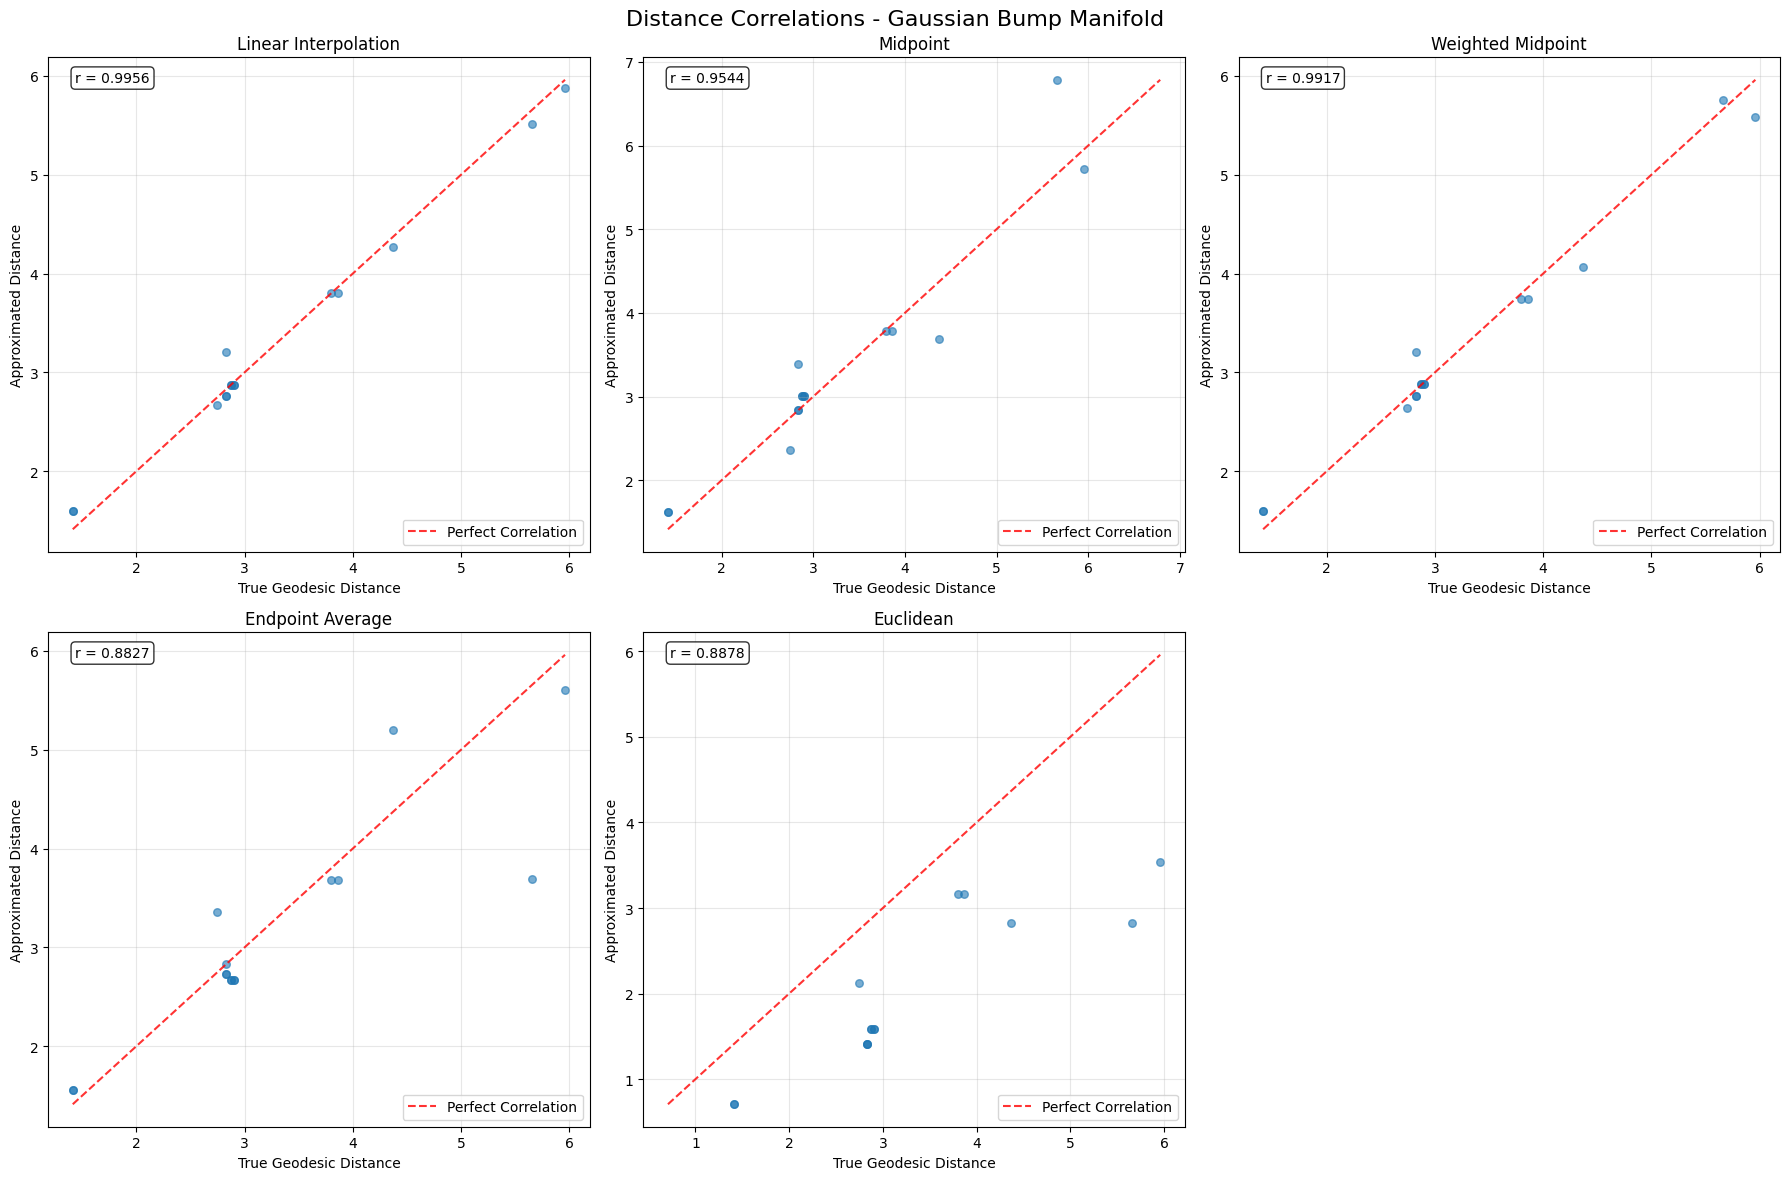

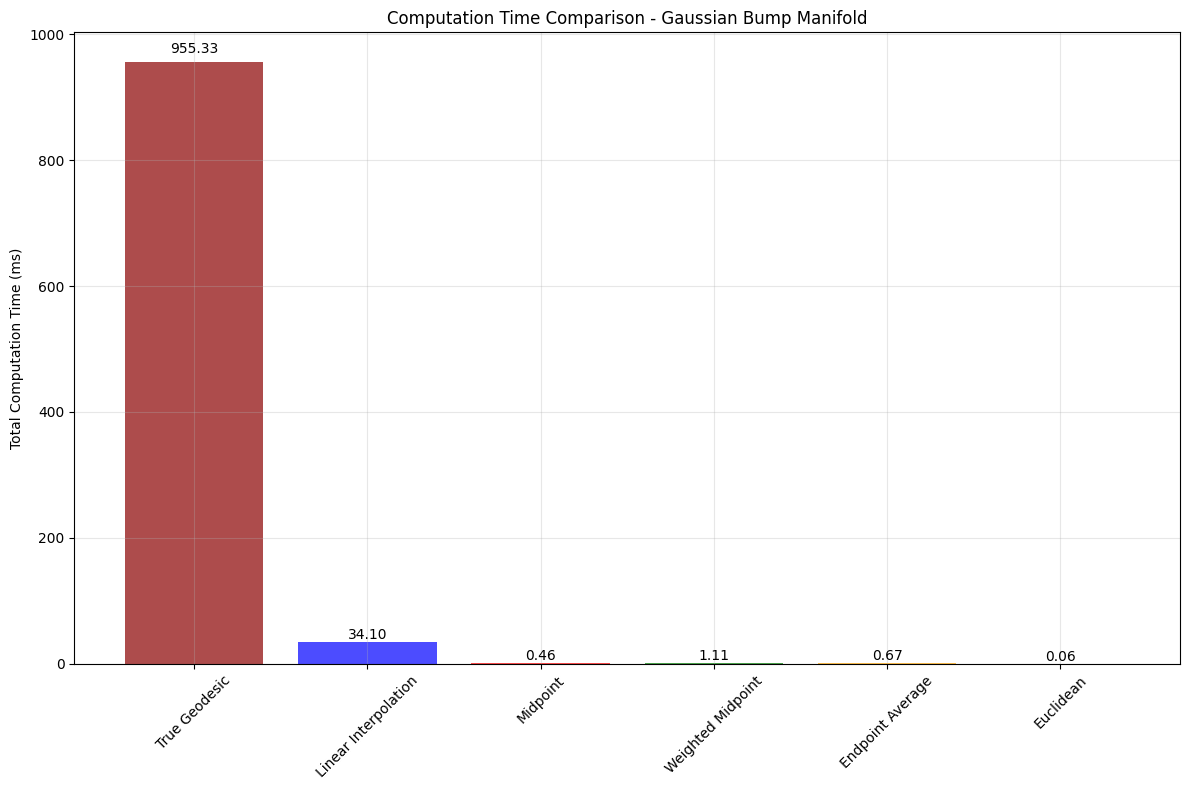

Generating example geodesic visualization...


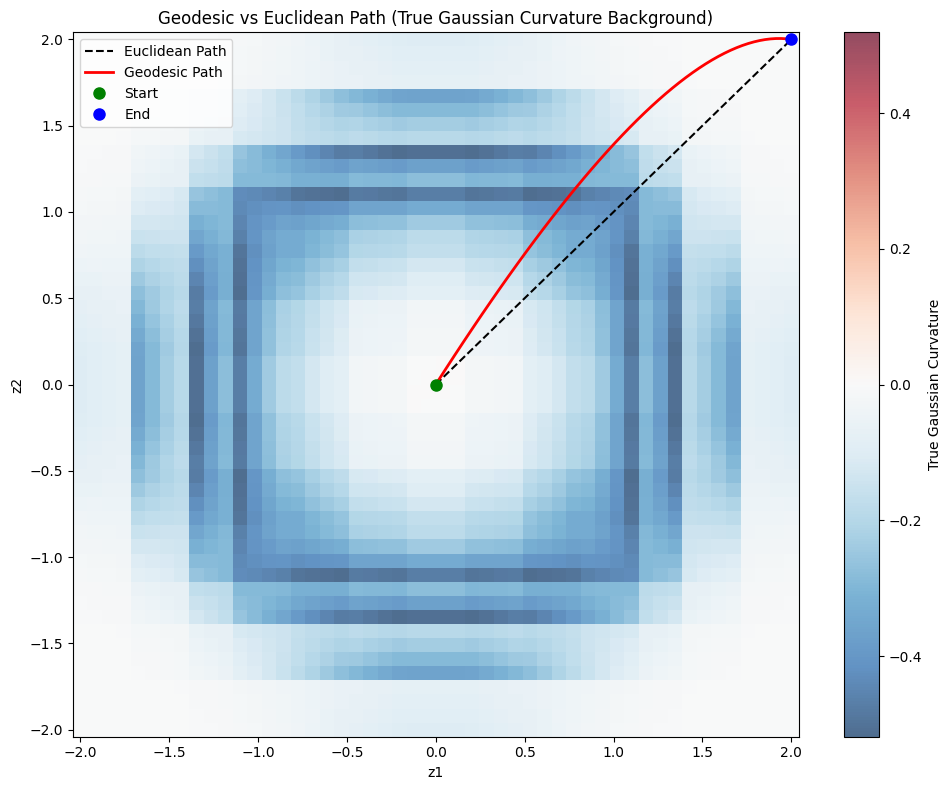


Gaussian Bump Experiment Results:
 {'linear_interpolation': {'mean_absolute_error': np.float64(0.09568864615818867), 'max_absolute_error': np.float64(0.37743377106838505), 'mean_relative_error': np.float64(0.038768493151474154), 'max_relative_error': np.float64(0.1338725957798448), 'rmse': np.float64(0.13524848088491712), 'mean_computation_time': 0.002273114522298177}, 'midpoint': {'mean_absolute_error': np.float64(0.2668724344349743), 'max_absolute_error': np.float64(1.1280101131766571), 'mean_relative_error': np.float64(0.08178519729876027), 'max_relative_error': np.float64(0.19935380163795832), 'rmse': np.float64(0.4006804747867559), 'mean_computation_time': 3.080368041992187e-05}, 'weighted_midpoint': {'mean_absolute_error': np.float64(0.13380981463906758), 'max_absolute_error': np.float64(0.37750126967831044), 'mean_relative_error': np.float64(0.046707899080461045), 'max_relative_error': np.float64(0.13340591727664644), 'rmse': np.float64(0.18165292825875118), 'mean_computation_t

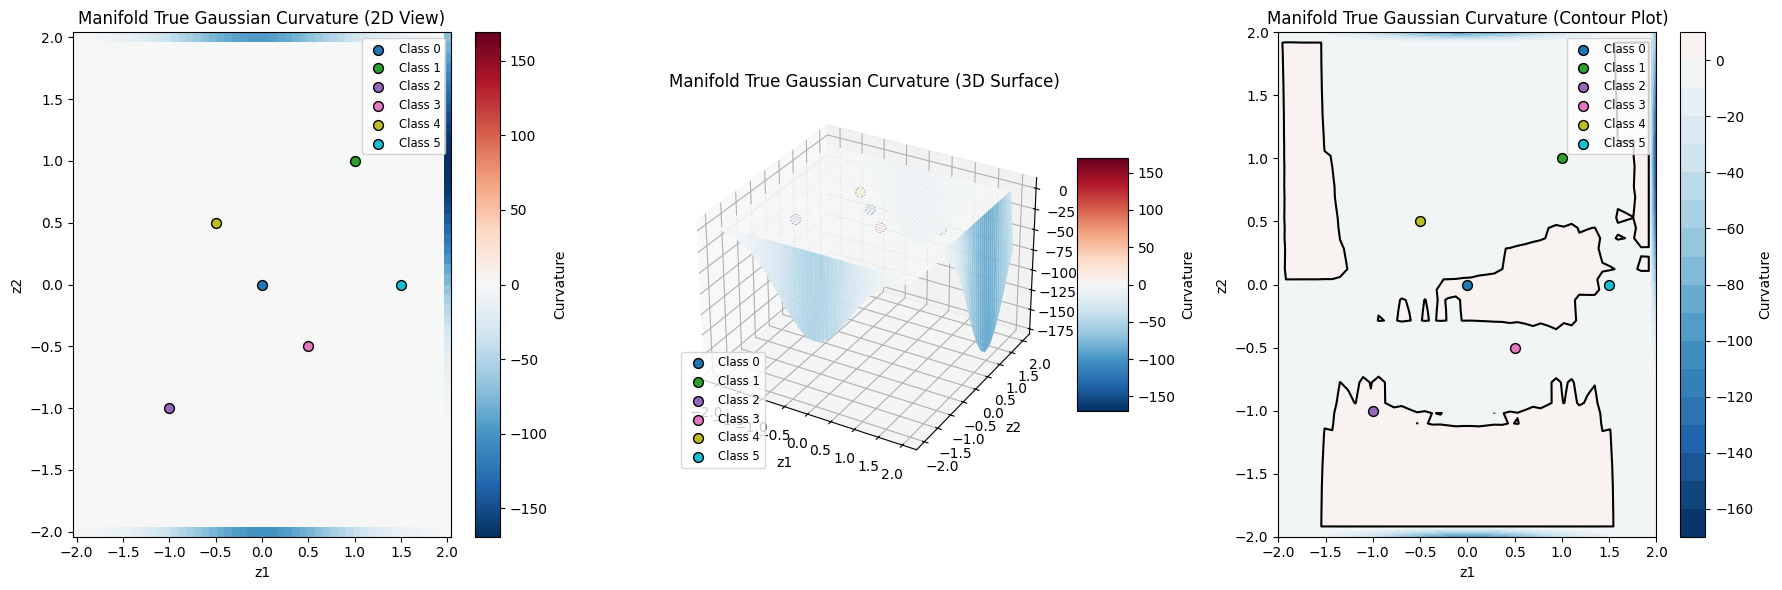

/var/folders/qc/fbm2wz190nqd87d2mq7l90_80000gn/T/ipykernel_73664/138407756.py:249: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(error_data, labels=labels_list)


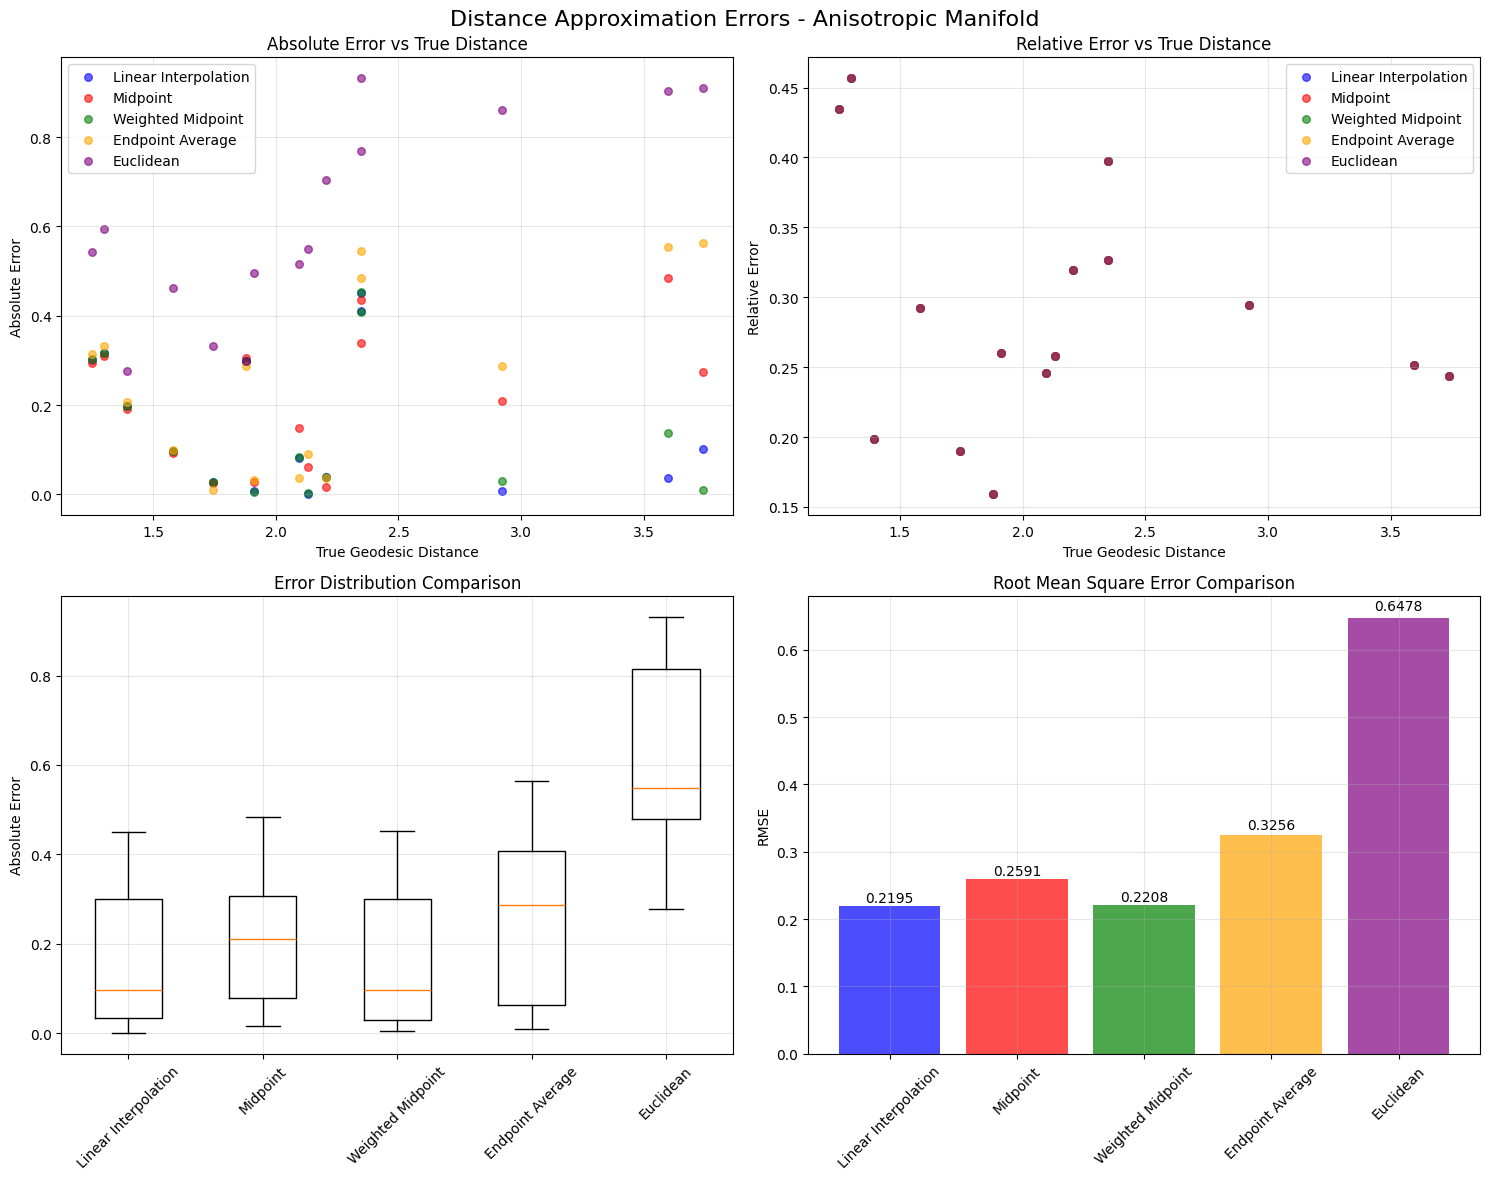

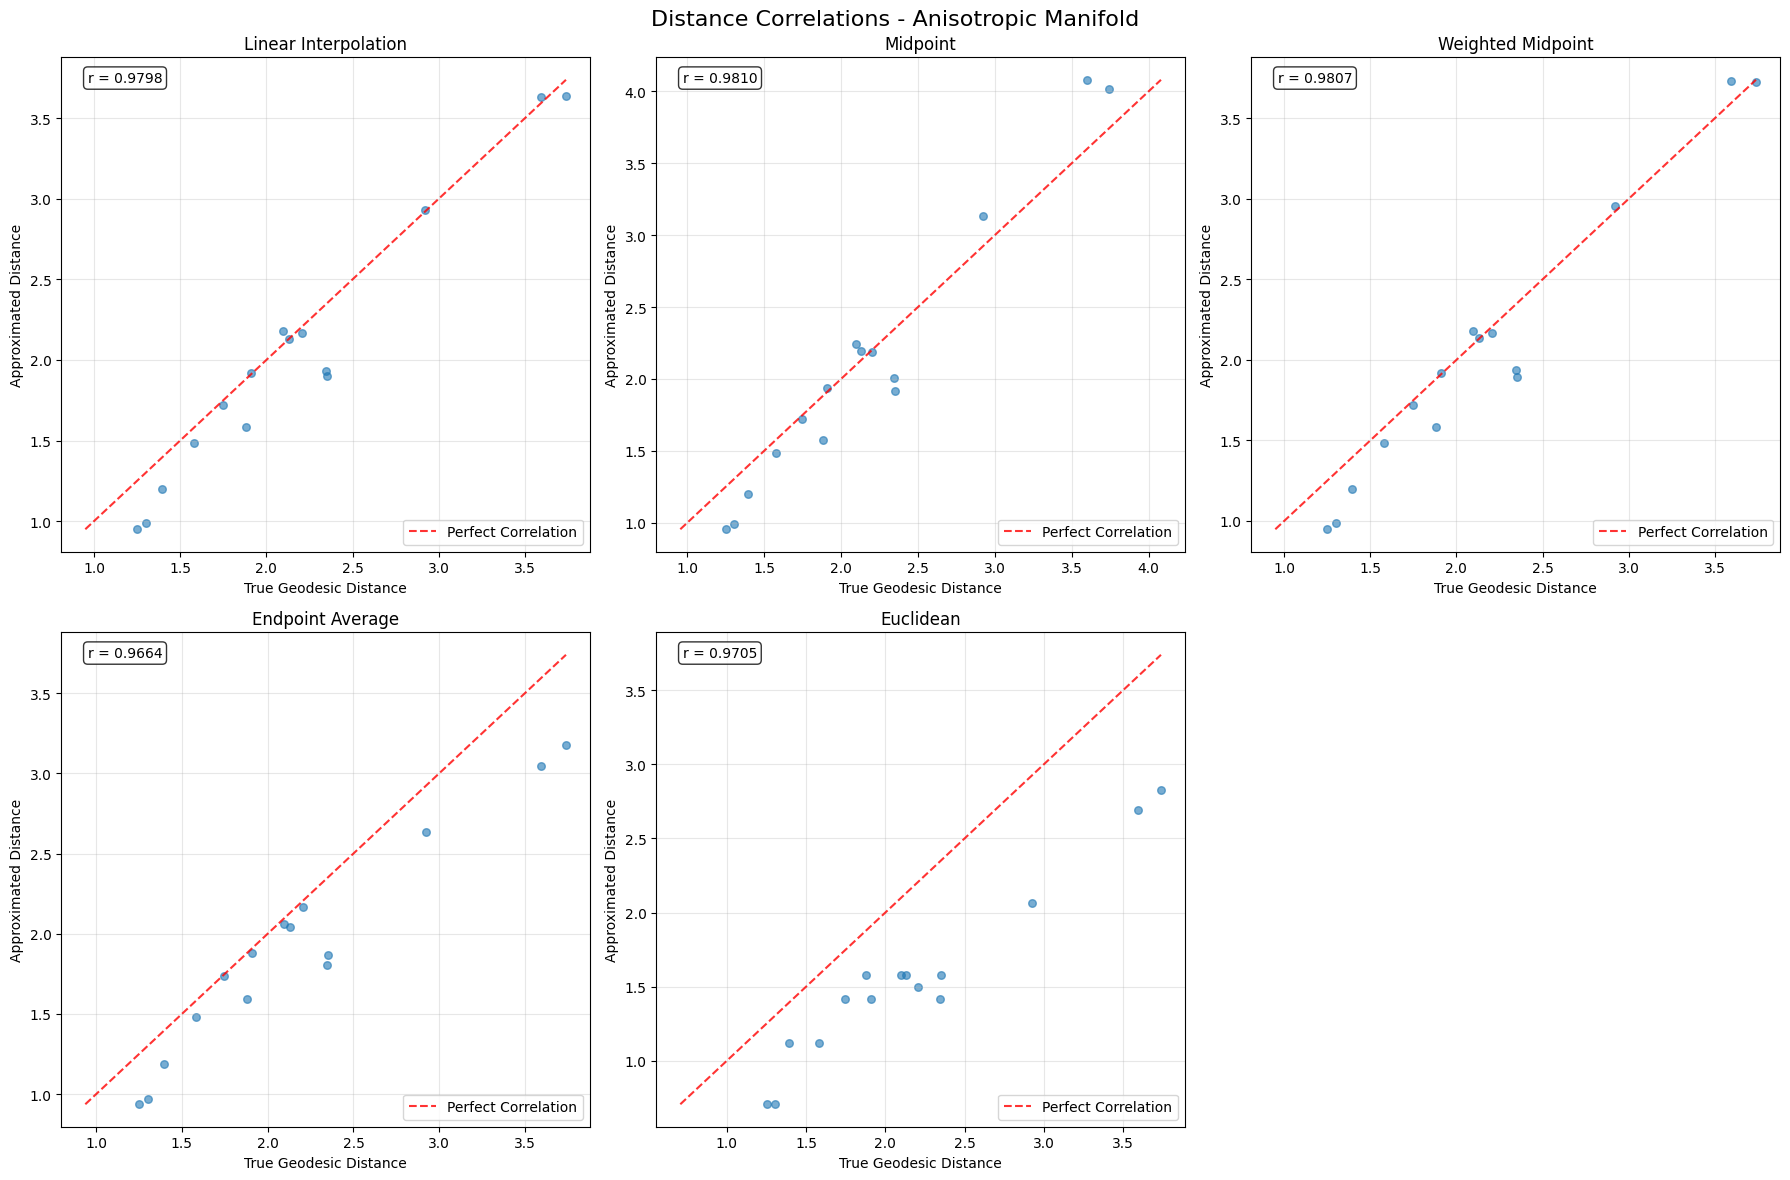

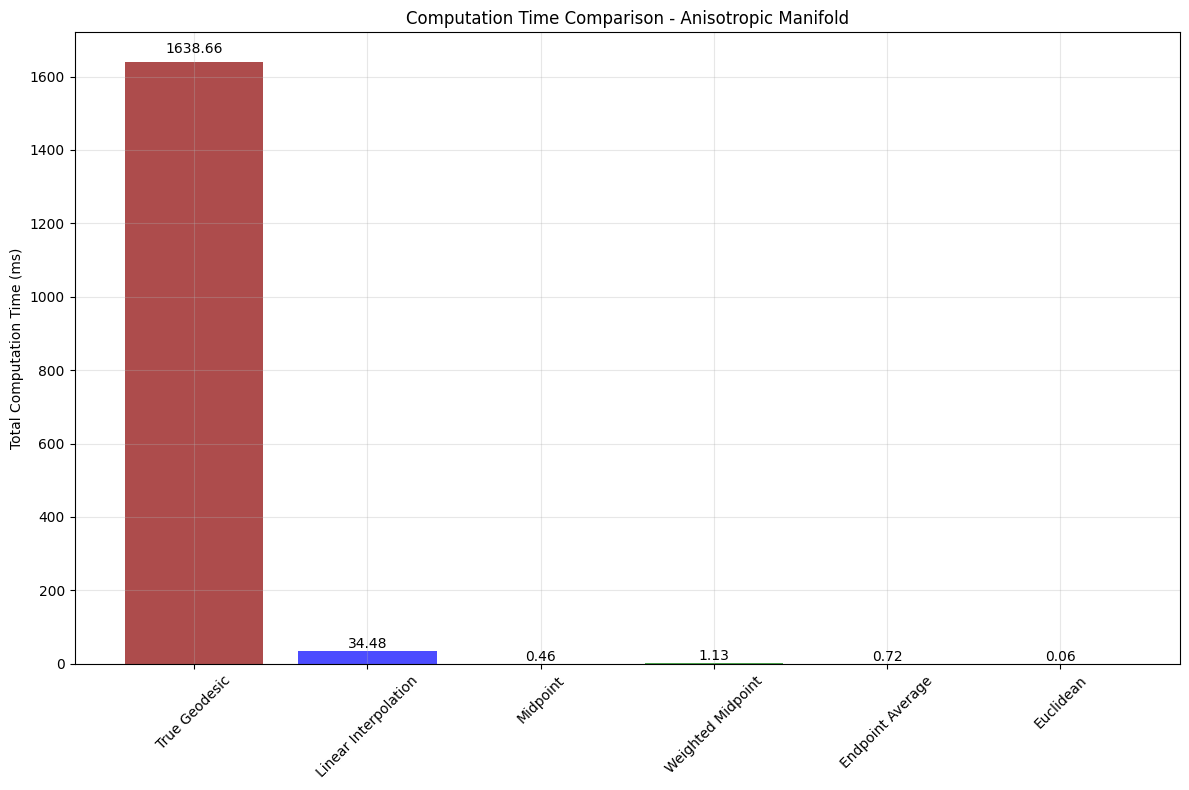

Generating example geodesic visualization...


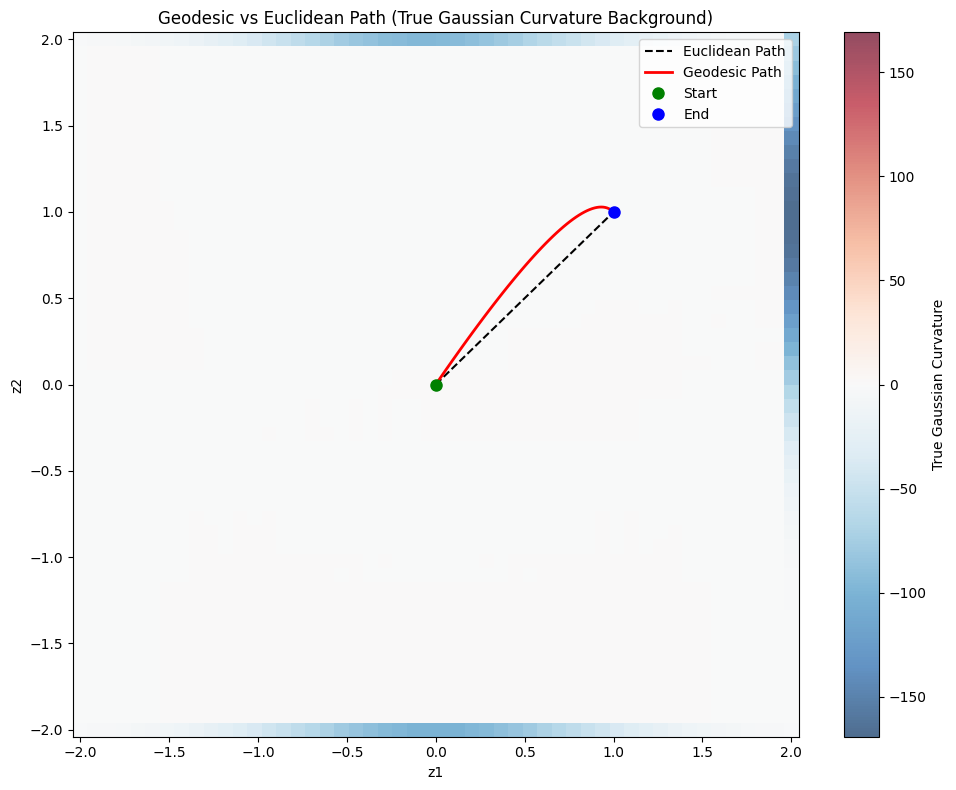


Anisotropic Experiment Results:
 {'linear_interpolation': {'mean_absolute_error': np.float64(0.15840554648548394), 'max_absolute_error': np.float64(0.45108150865678454), 'mean_relative_error': np.float64(0.08870803826568391), 'max_relative_error': np.float64(0.24295108561355377), 'rmse': np.float64(0.21952248511035313), 'mean_computation_time': 0.0022987683614095053}, 'midpoint': {'mean_absolute_error': np.float64(0.21451729599370187), 'max_absolute_error': np.float64(0.4834968459762714), 'mean_relative_error': np.float64(0.10526535374437294), 'max_relative_error': np.float64(0.23760324734277802), 'rmse': np.float64(0.25907640330766424), 'mean_computation_time': 3.062884012858073e-05}, 'weighted_midpoint': {'mean_absolute_error': np.float64(0.16106032597236591), 'max_absolute_error': np.float64(0.4525077580495833), 'mean_relative_error': np.float64(0.08972796276433534), 'max_relative_error': np.float64(0.2435066351771091), 'rmse': np.float64(0.22075808837288724), 'mean_computation_tim

In [ ]:
from framework.distanceApproxBenchmarker import DistanceApproxBenchmarker

# Define a simple Euclidean metric tensor function
def euclidean_metric_tensor_func(point: np.ndarray) -> np.ndarray:
    return np.eye(len(point))

# Define a curved metric tensor function
def curved_metric_tensor_func(point: np.ndarray) -> np.ndarray:
    x, y = point[0], point[1]
    g_xx = 1 + x**2
    g_yy = 1 + y**2
    return np.array([[g_xx, 0], [0, g_yy]])

# Example manifolds for testing
def hyperbolic_metric(z: np.ndarray) -> np.ndarray:
    """
    Hyperbolic metric in Poincaré disk model: g = (4/(1-|z|²)²)I
    High curvature near boundary.
    """
    r_squared = np.sum(z**2)
    # Clamp r_squared to avoid issues near or outside the boundary for numerical stability
    if r_squared >= 0.999999: # Use a very small epsilon
        r_squared = 0.999999
    elif r_squared < 0: # Should not happen, but as a safeguard
        r_squared = 0
    
    factor = 4.0 / (1 - r_squared)**2
    return factor * np.eye(2)

def gaussian_bump_metric(z: np.ndarray) -> np.ndarray:
    """
    Metric with Gaussian-shaped distortion: g = (1 + α*exp(-|z|²/σ²))I
    Creates a region of high curvature around the origin.
    """
    alpha = 5.0  # Strength of distortion
    sigma = 1.0  # Width of distortion
    r_squared = np.sum(z**2)
    
    factor = 1.0 + alpha * np.exp(-r_squared / (sigma**2))
    return factor * np.eye(2)

def anisotropic_metric(z: np.ndarray) -> np.ndarray:
    """
    Anisotropic metric with different scaling in x and y directions.
    """
    x, y = z[0], z[1]
    
    # Create anisotropy that varies with position
    g11 = 1.0 + 2.0 * np.exp(-(x**2 + y**2))
    g22 = 1.0 + 0.5 * np.exp(-((x-1)**2 + (y-1)**2))
    g12 = 0.3 * np.sin(x) * np.cos(y)  # Off-diagonal term
    
    G = np.array([[g11, g12], [g12, g22]])
    
    # Ensure positive definiteness for numerical stability
    eigenvals = np.linalg.eigvals(G)
    min_eigenval = np.min(eigenvals)
    if min_eigenval <= 1e-6: # Check if close to non-positive definite
        G += (1e-6 - min_eigenval) * np.eye(2) # Add a small positive constant to ensure positive definiteness
    
    return G

# --- Setup for Euclidean Manifold Experiment ---
print("--- Setting up Euclidean Manifold Experiment ---")
bounds_euclidean = np.array([[0.0, 1.0], [0.0, 1.0]])
# Create BoundedManifold instance with caching enabled
euclidean_manifold = BoundedManifold(euclidean_metric_tensor_func, bounds_euclidean, cache=True, grid_points_per_dim=20)
# Important: Populate the cache before running experiments
euclidean_manifold.compute_full_grid_metric_tensor()

# Create an instance of the new RiemannianManifoldExperiment
euclidean_experiment = DistanceApproxBenchmarker(euclidean_manifold, manifold_name="Euclidean")

# Define test points
test_points_euclidean = np.array([
    [0.1, 0.1],
    [0.9, 0.9],
    [0.1, 0.5],
    [0.5, 0.1],
    [0.7, 0.3],
    [0.3, 0.7]
])

# Run the experiment for Euclidean manifold
print("\n--- Running Euclidean Manifold Experiment ---")
results_euclidean = euclidean_experiment.run_experiment(test_points_euclidean, visualize=True)
print("\nEuclidean Experiment Results:\n", results_euclidean['statistics'])

# --- Setup for Curved Manifold Experiment ---
print("\n--- Setting up Curved Manifold Experiment ---")
bounds_curved = np.array([[-2.0, 2.0], [-2.0, 2.0]])
# Create BoundedManifold instance with caching enabled
curved_manifold = BoundedManifold(curved_metric_tensor_func, bounds_curved, cache=True, grid_points_per_dim=20)
# Important: Populate the cache before running experiments
curved_manifold.compute_full_grid_metric_tensor()

# Create an instance of the new RiemannianManifoldExperiment
curved_experiment = DistanceApproxBenchmarker(curved_manifold, manifold_name="Curved")

# Define test points for curved manifold (can be different)
test_points_curved = np.array([
    [-1.5, -1.5],
    [1.5, 1.5],
    [-1.0, 0.0],
    [0.0, 1.0],
    [0.5, -0.5],
    [-0.5, 0.5]
])

# Run the experiment for Curved manifold
print("\n--- Running Curved Manifold Experiment ---")
results_curved = curved_experiment.run_experiment(test_points_curved, visualize=True)
print("\nCurved Experiment Results:\n", results_curved['statistics'])

# --- Setup for Hyperbolic Manifold Experiment ---
print("\n--- Setting up Hyperbolic Manifold Experiment ---")
# For Poincaré disk, bounds should be within radius 1
bounds_hyperbolic = np.array([[-0.9, 0.9], [-0.9, 0.9]])
hyperbolic_manifold = BoundedManifold(hyperbolic_metric, bounds_hyperbolic, cache=True, grid_points_per_dim=20)
hyperbolic_manifold.compute_full_grid_metric_tensor()
hyperbolic_experiment = DistanceApproxBenchmarker(hyperbolic_manifold, manifold_name="Hyperbolic")
test_points_hyperbolic = np.array([
    [0.0, 0.0],
    [0.8, 0.8],
    [-0.5, 0.5],
    [0.5, -0.5],
    [0.7, 0.0],
    [-0.7, 0.0]
])
print("\n--- Running Hyperbolic Manifold Experiment ---")
results_hyperbolic = hyperbolic_experiment.run_experiment(test_points_hyperbolic, visualize=True)
print("\nHyperbolic Experiment Results:\n", results_hyperbolic['statistics'])

# --- Setup for Gaussian Bump Manifold Experiment ---
print("\n--- Setting up Gaussian Bump Manifold Experiment ---")
bounds_gaussian_bump = np.array([[-3.0, 3.0], [-3.0, 3.0]])
gaussian_bump_manifold = BoundedManifold(gaussian_bump_metric, bounds_gaussian_bump, cache=True, grid_points_per_dim=20)
gaussian_bump_manifold.compute_full_grid_metric_tensor()
gaussian_bump_experiment = DistanceApproxBenchmarker(gaussian_bump_manifold, manifold_name="Gaussian Bump")
test_points_gaussian_bump = np.array([
    [0.0, 0.0],
    [2.0, 2.0],
    [-1.0, 1.0],
    [1.0, -1.0],
    [0.5, 0.5],
    [-0.5, -0.5]
])
print("\n--- Running Gaussian Bump Manifold Experiment ---")
results_gaussian_bump = gaussian_bump_experiment.run_experiment(test_points_gaussian_bump, visualize=True)
print("\nGaussian Bump Experiment Results:\n", results_gaussian_bump['statistics'])

# --- Setup for Anisotropic Manifold Experiment ---
print("\n--- Setting up Anisotropic Manifold Experiment ---")
bounds_anisotropic = np.array([[-2.0, 2.0], [-2.0, 2.0]])
anisotropic_manifold = BoundedManifold(anisotropic_metric, bounds_anisotropic, cache=True, grid_points_per_dim=20)
anisotropic_manifold.compute_full_grid_metric_tensor()
anisotropic_experiment = DistanceApproxBenchmarker(anisotropic_manifold, manifold_name="Anisotropic")
test_points_anisotropic = np.array([
    [0.0, 0.0],
    [1.0, 1.0],
    [-1.0, -1.0],
    [0.5, -0.5],
    [-0.5, 0.5],
    [1.5, 0.0]
])
print("\n--- Running Anisotropic Manifold Experiment ---")
results_anisotropic = anisotropic_experiment.run_experiment(test_points_anisotropic, visualize=True)
print("\nAnisotropic Experiment Results:\n", results_anisotropic['statistics'])